In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import librosa
import librosa.display
import numpy as np

In [2]:
data = pd.read_csv('./db/UrbanSound8K.csv')

In [3]:
classes = data.loc[:, 'class'].unique()
classes

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

In [4]:
FRAME_SIZE = 512
HOP_LENGTH = 256
N_MFCC = 20

In [5]:
def amplitude_envelope(signal: np.ndarray, frame_size: int, hop_length: int) -> np.array:
    ae = []
    for i in range(0, len(signal), hop_length):
        ae.append(max(signal[i:i + frame_size]))
    return np.array(ae)

def root_mean_square(signal: np.ndarray, frame_size: int, hop_length: int) -> np.array:
    return librosa.feature.rms(y=signal, frame_length=frame_size, hop_length=hop_length)[0]

def zero_crossing_rate(signal: np.ndarray, frame_size: int, hop_length: int) -> np.ndarray:
    return librosa.feature.zero_crossing_rate(y=signal, frame_length=frame_size, hop_length=hop_length)[0]

def fast_fourier_transform(signal: np.ndarray) -> np.ndarray:
    return np.fft.fft(signal)

def magnitude_spectrum(signal: np.ndarray) -> np.ndarray:
    return np.abs(signal)

def plot_magnitude_spectrum(signal_ft: np.ndarray, magnitude: np.ndarray, title: str, sr: int, f_ratio: int = 1):
    plt.figure(figsize=(18, 5))
    frequency = np.linspace(0, sr, len(magnitude))
    num_frequency_bins = int(len(frequency) * f_ratio)
    plt.plot(frequency[:num_frequency_bins], magnitude[:num_frequency_bins])
    plt.xlabel('Frequency [Hz]')
    plt.title(title)
    plt.show()

def short_time_fourier_transform(signal: np.ndarray, n_fft: int, hop_length: int) -> np.ndarray:
    return librosa.stft(y=signal, n_fft=n_fft, hop_length=hop_length)

def plot_spectogram(Y: np.ndarray, sr: int, hop_length: int, title: str, y_axis='linear'):
    plt.figure(figsize=(25, 10))
    plt.title(title)
    librosa.display.specshow(data=librosa.power_to_db(Y), sr=sr, hop_length=hop_length, x_axis='time', y_axis=y_axis)
    plt.colorbar(format='%+2.f')
    plt.show()

def extract_mfcc(signal: np.ndarray, n_mfcc: int, sr: int) -> np.ndarray:
    return librosa.feature.mfcc(y=signal, n_mfcc=n_mfcc, sr=sr)

def get_delta(data: np.ndarray) -> np.ndarray:
    return librosa.feature.delta(data=data)

def plot_mfcc(data: np.ndarray, x_axis: str, sr: int, title: str):
    plt.figure(figsize=(25, 10))
    plt.title(title)
    librosa.display.specshow(data=data, x_axis=x_axis, sr=sr)
    plt.colorbar(format='%+2.f')
    plt.show()

def extract_spectral_centroids(signal: np.ndarray, sr: int, n_fft: int, hop_length: int) -> np.ndarray:
    return librosa.feature.spectral_centroid(y=signal, sr=sr, n_fft=n_fft, hop_length=hop_length)[0]

def plot_spectral_centroid(data: np.ndarray, title: str):
    frames = range(len(data))
    t = librosa.frames_to_time(frames=frames)
    plt.figure(figsize=(25, 10))
    plt.title(title)
    plt.plot(t, data, color='b')
    plt.show()

def extract_bandwidth(signal: np.ndarray, sr: int, n_fft: int, hop_length: int) -> np.ndarray:
    return librosa.feature.spectral_bandwidth(y=signal, sr=sr, n_fft=n_fft, hop_length=hop_length)[0]

def plot_bandwidth(data: np.ndarray, title: str):
    frames = range(len(data))
    t = librosa.frames_to_time(frames=frames)
    plt.figure(figsize=(25, 10))
    plt.title(title)
    plt.plot(t, data, color='b')
    plt.show()

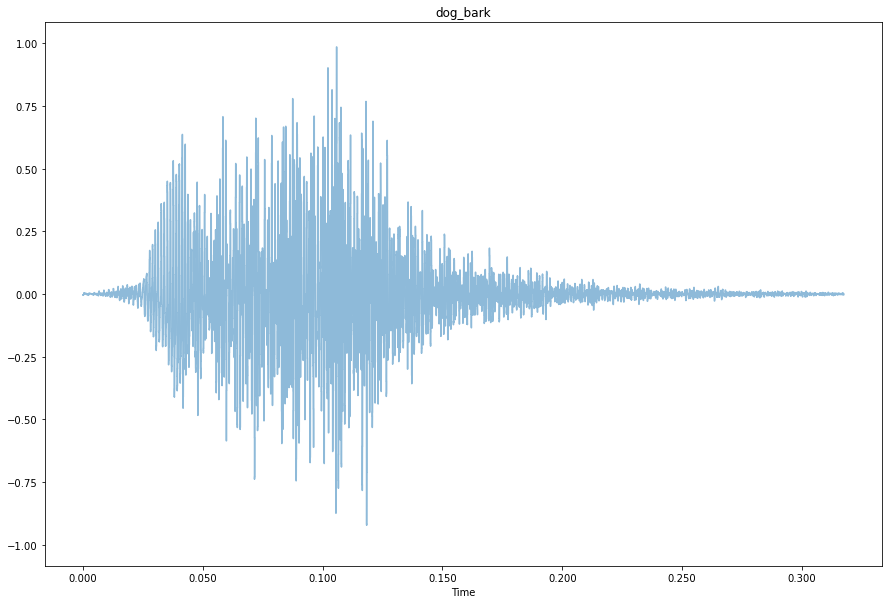

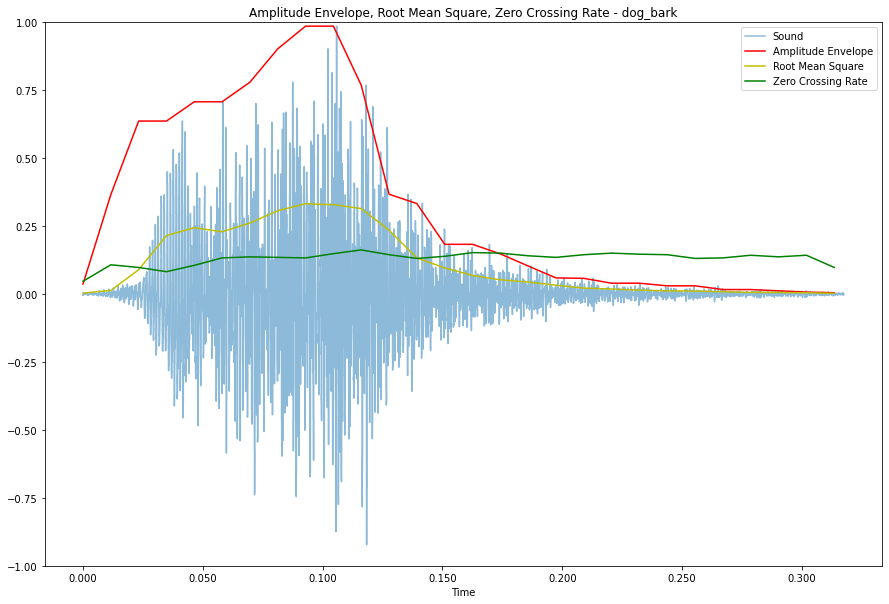

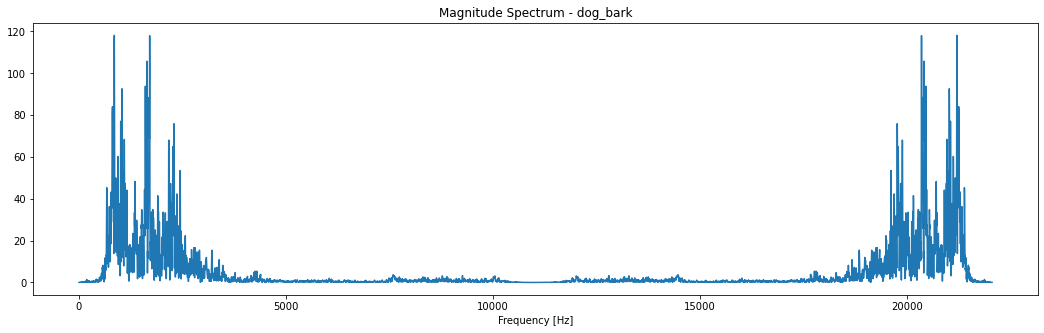

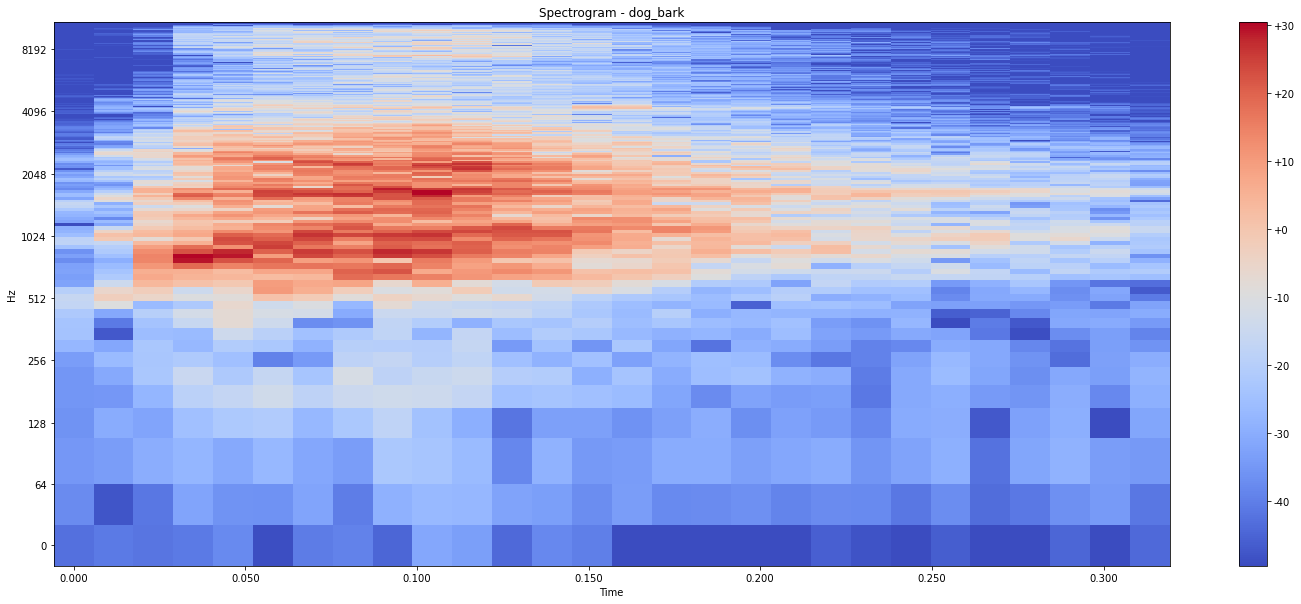

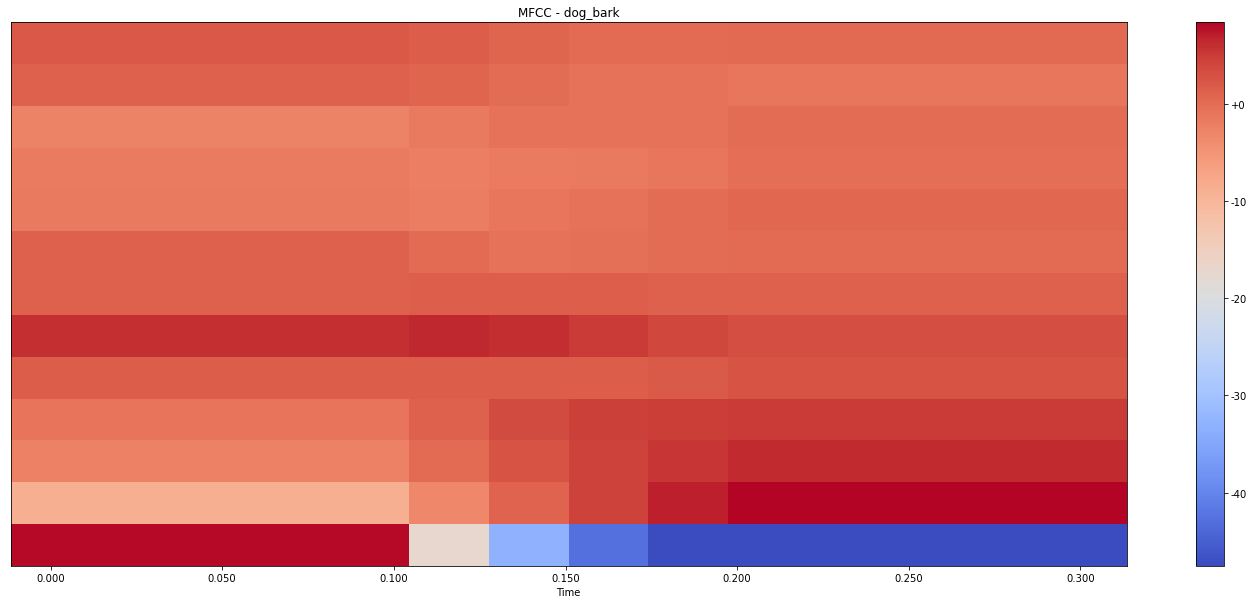

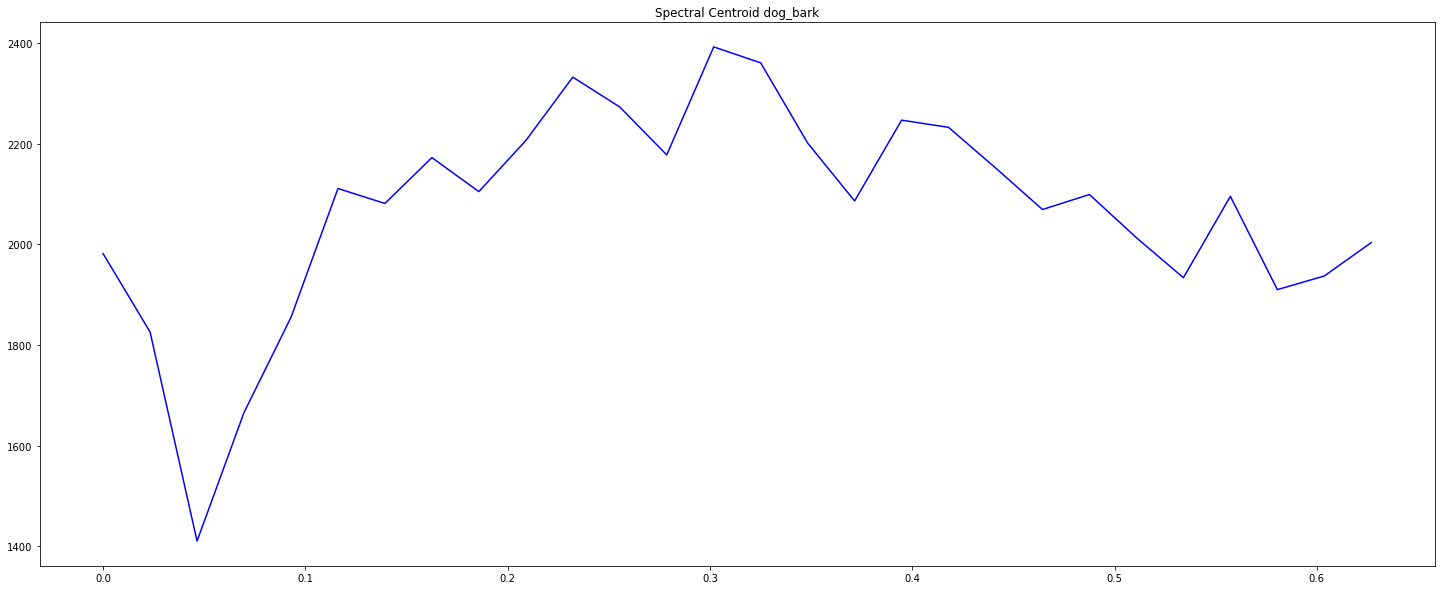

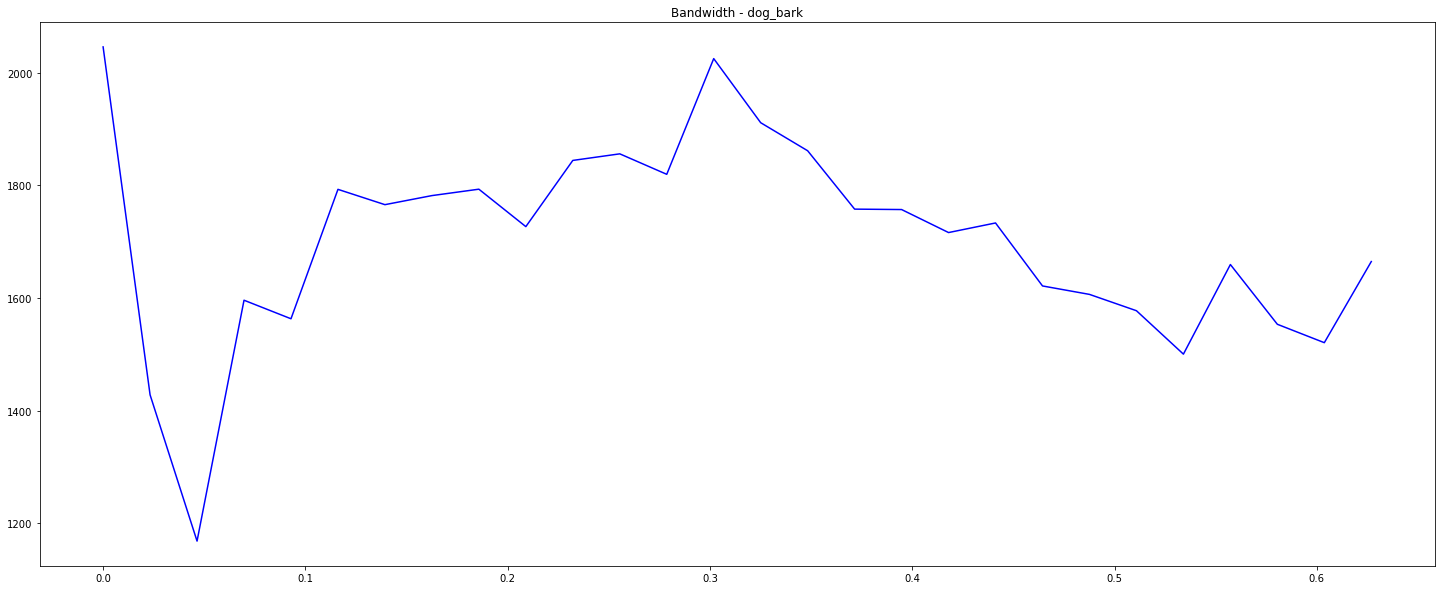

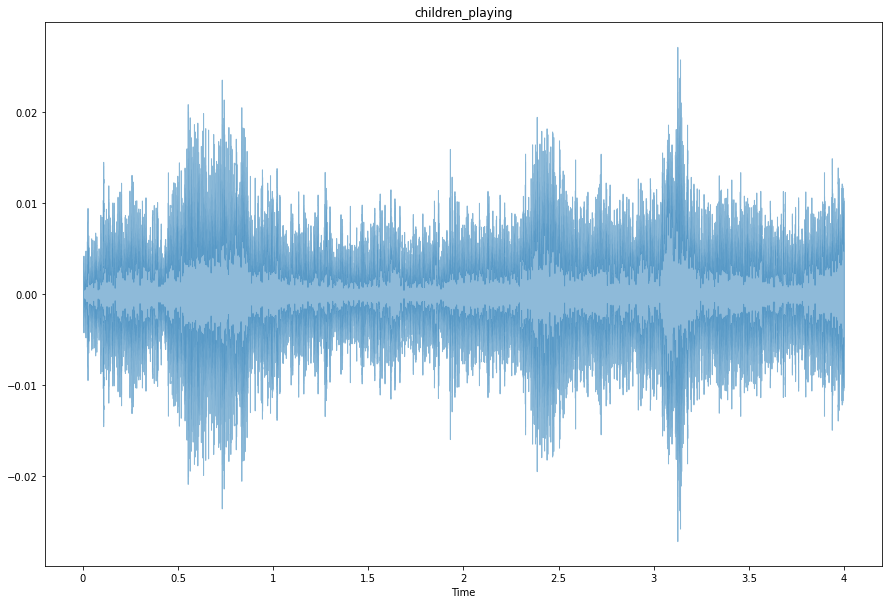

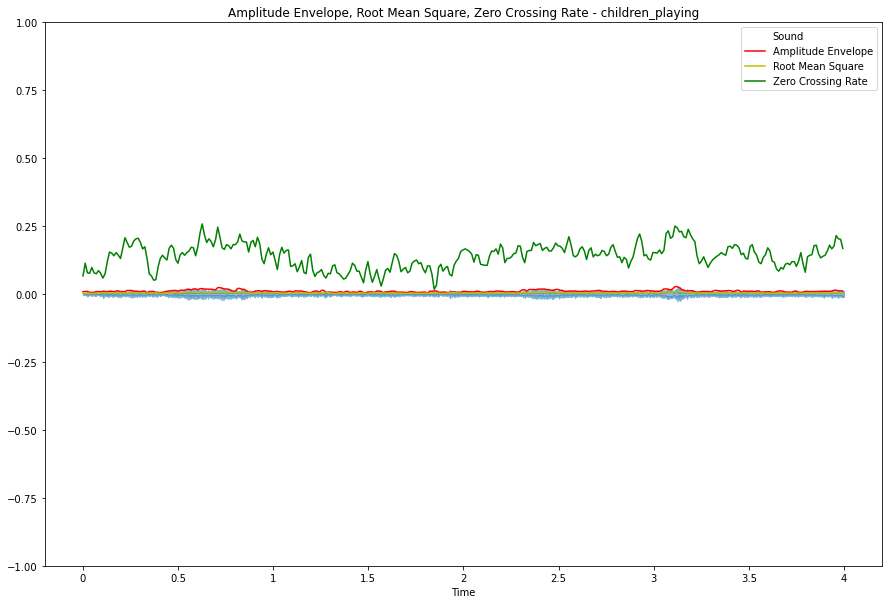

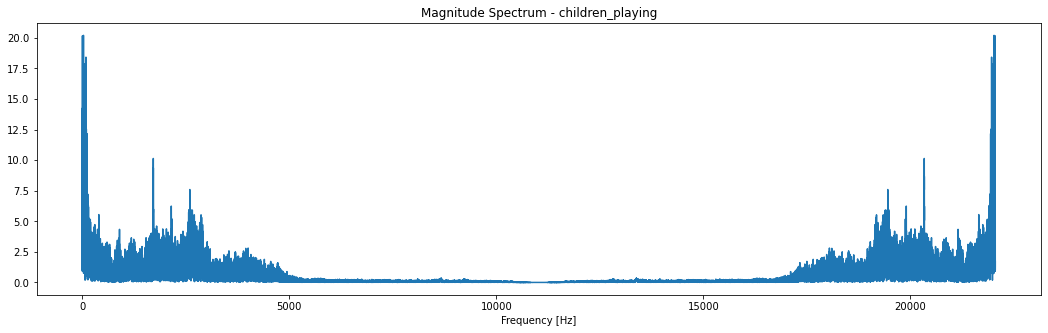

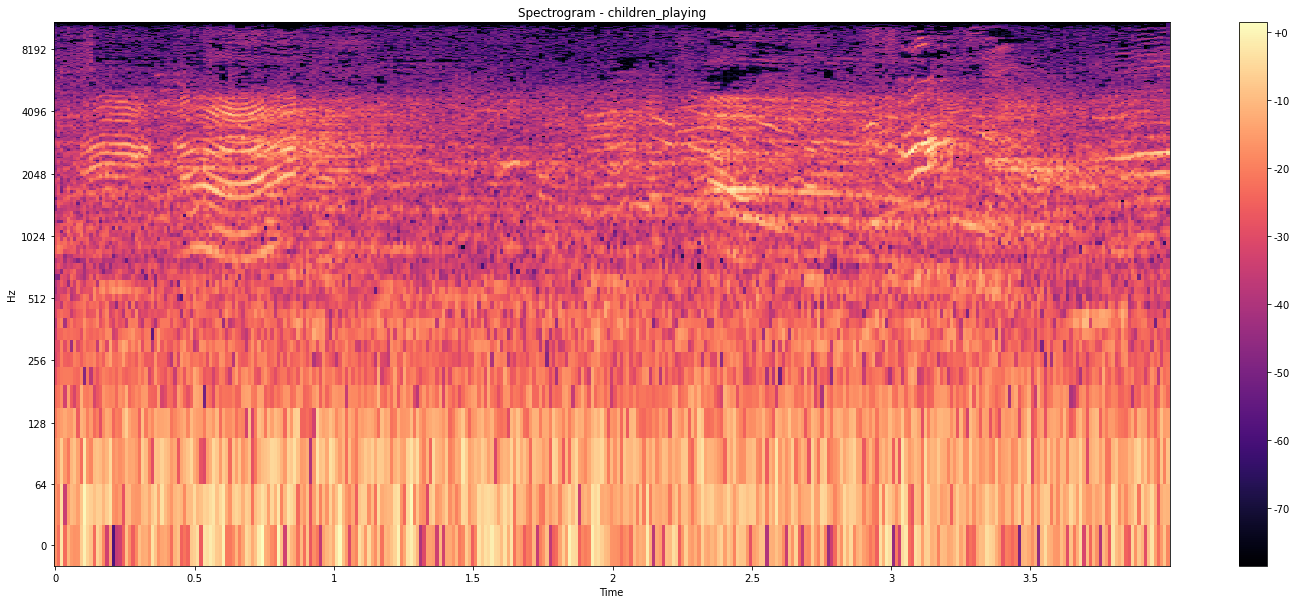

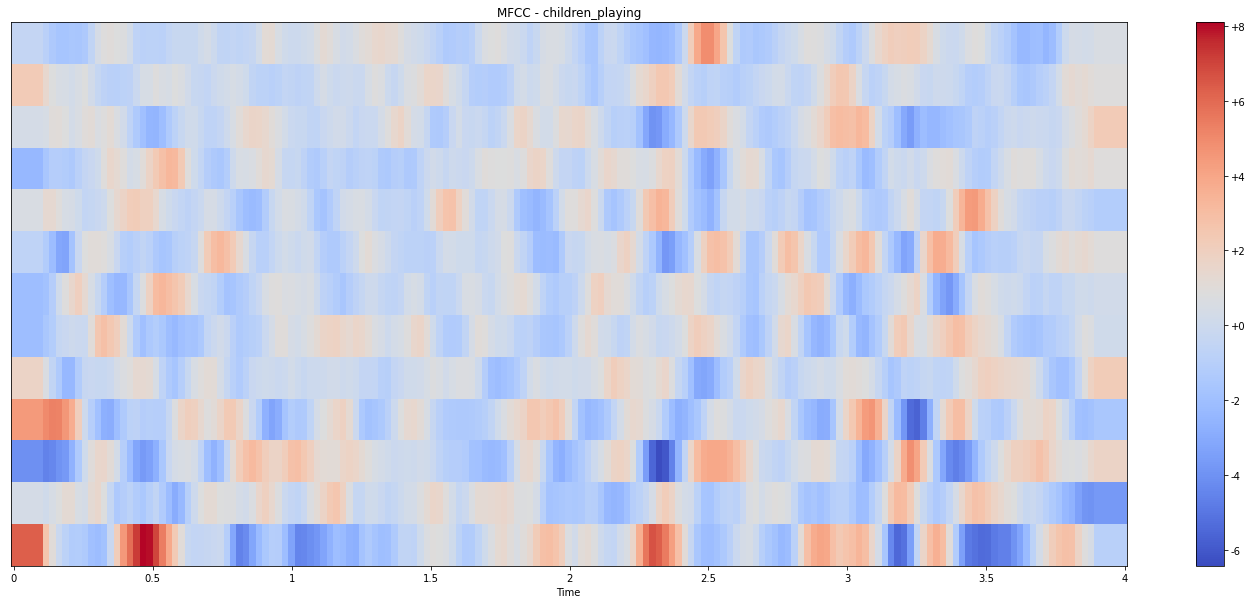

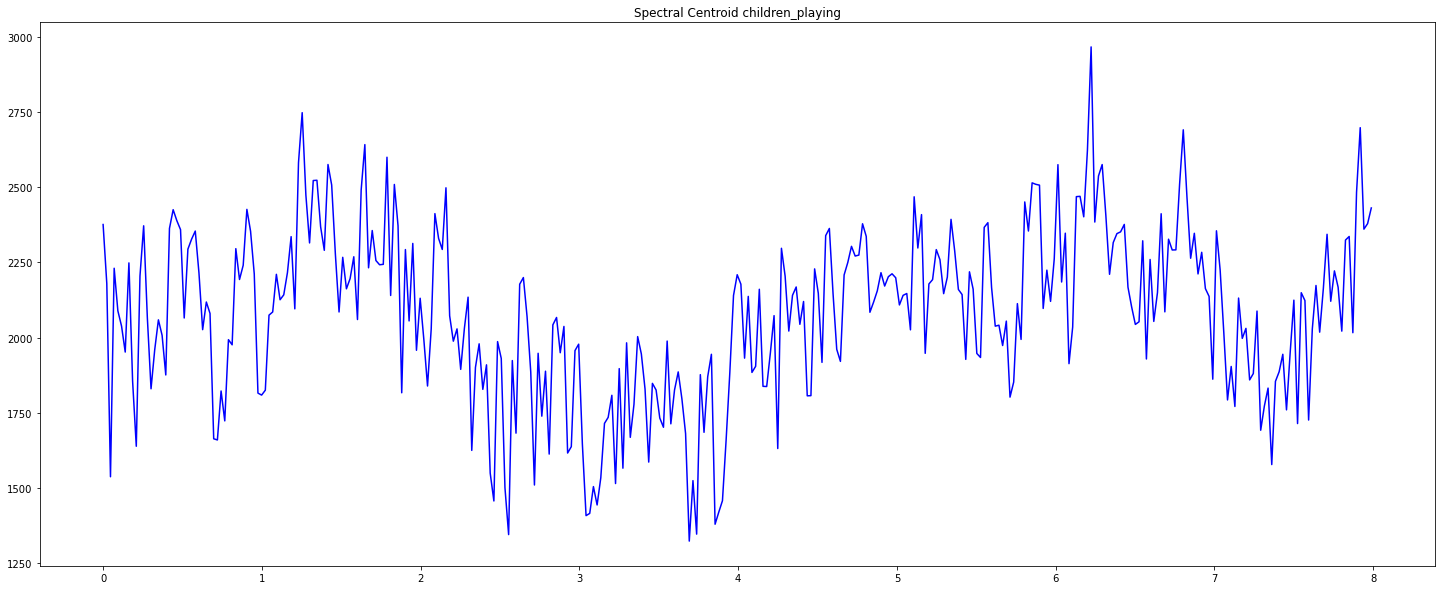

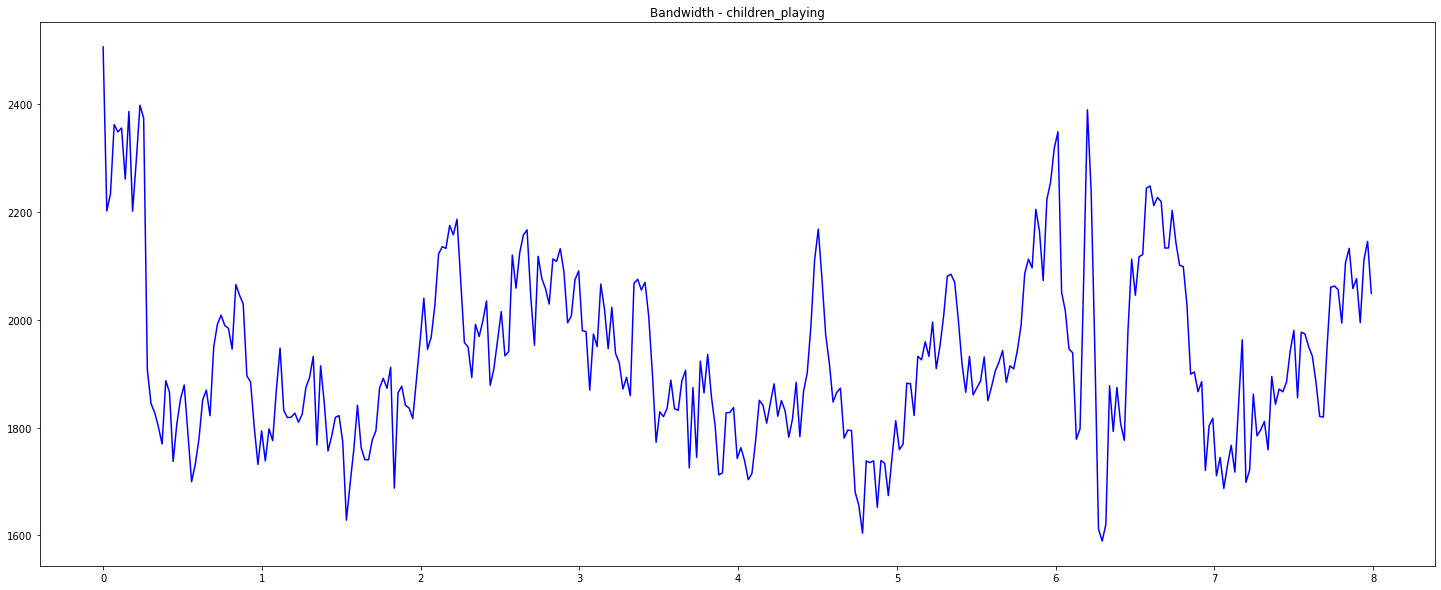

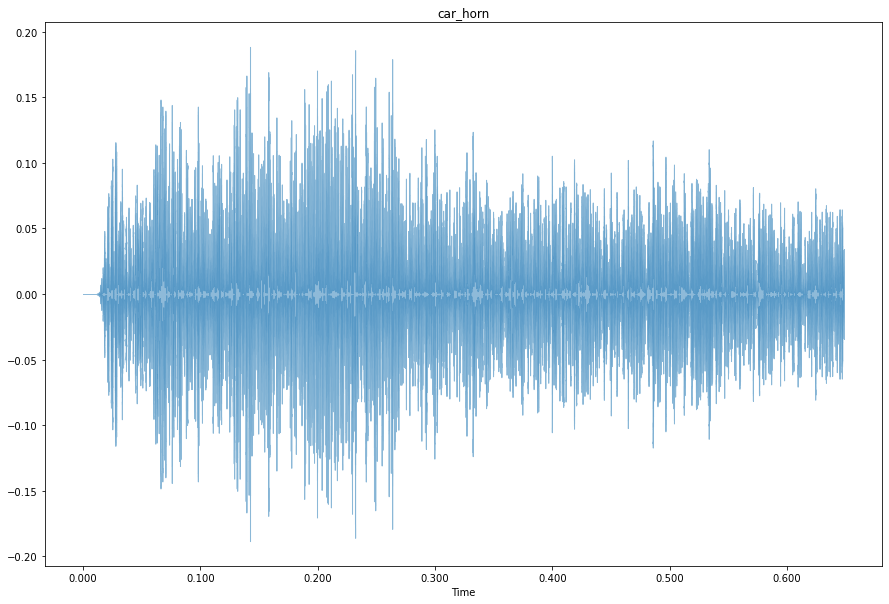

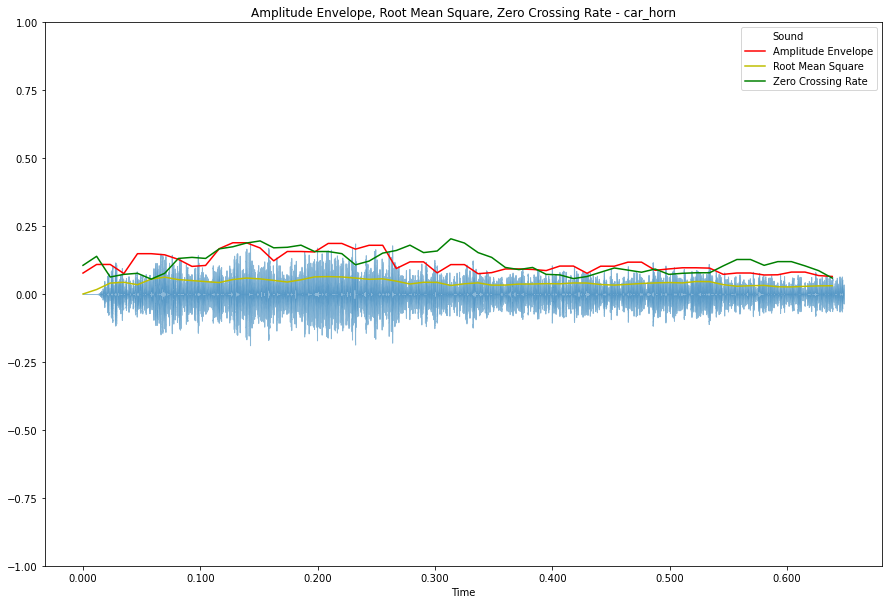

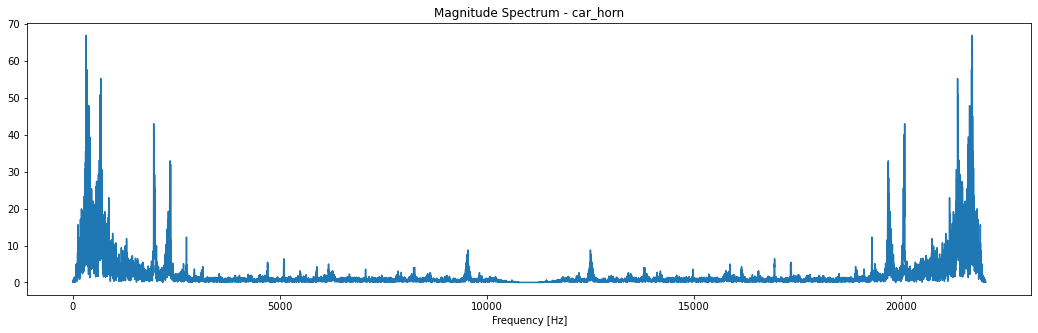

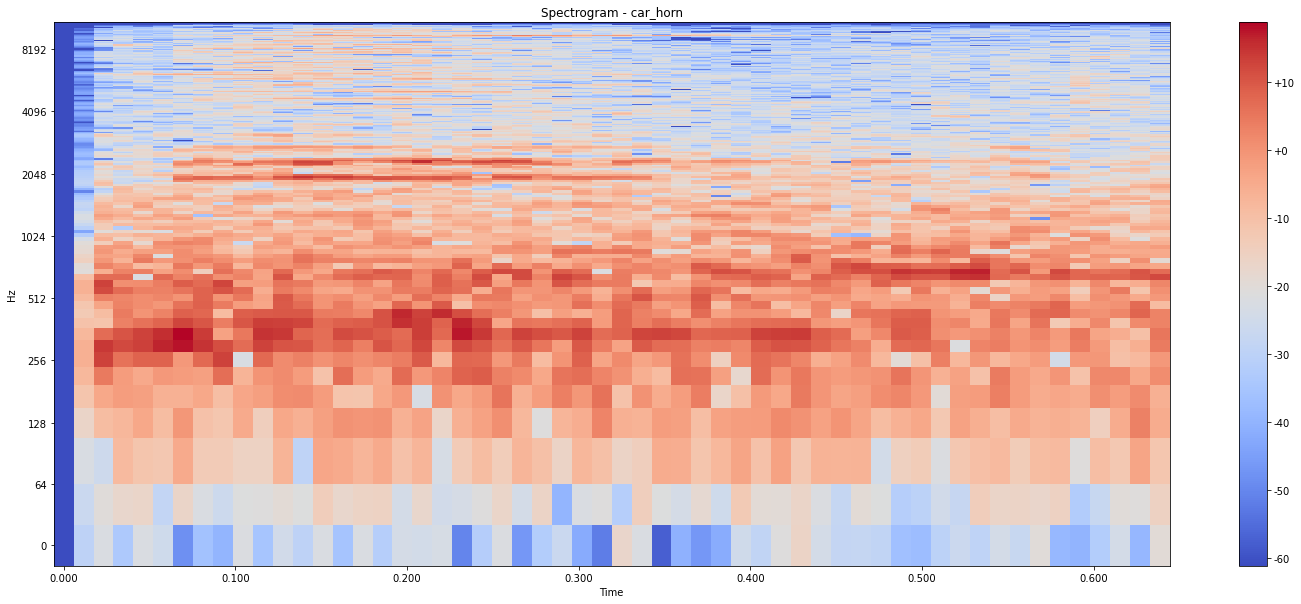

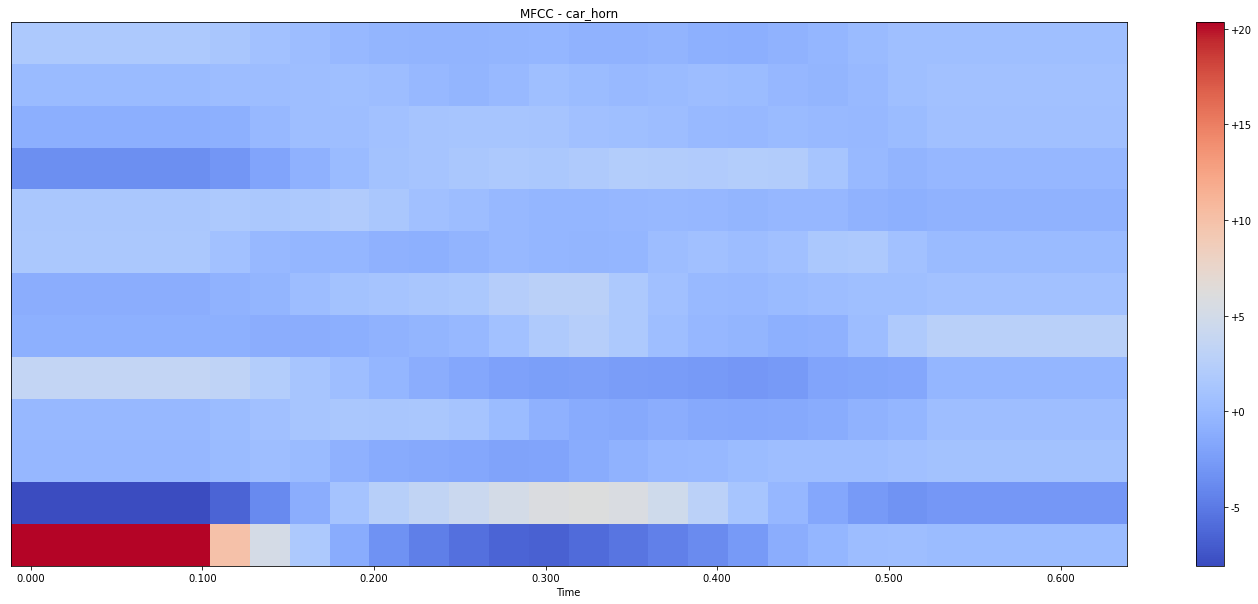

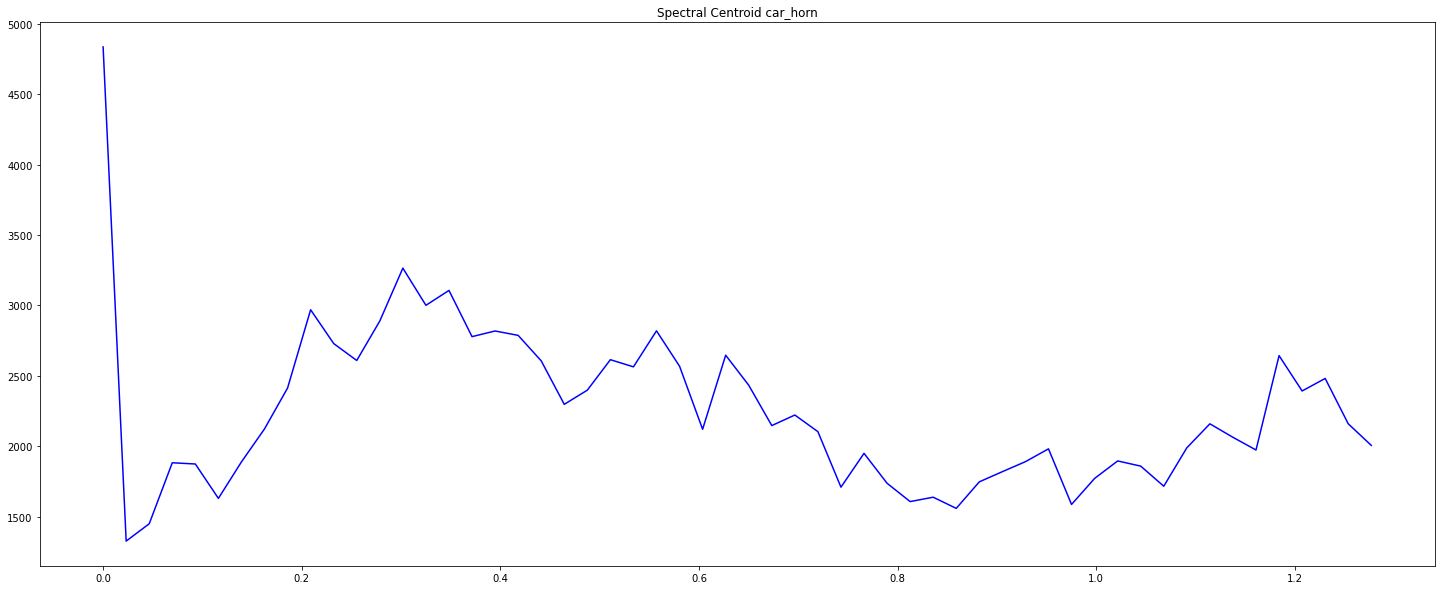

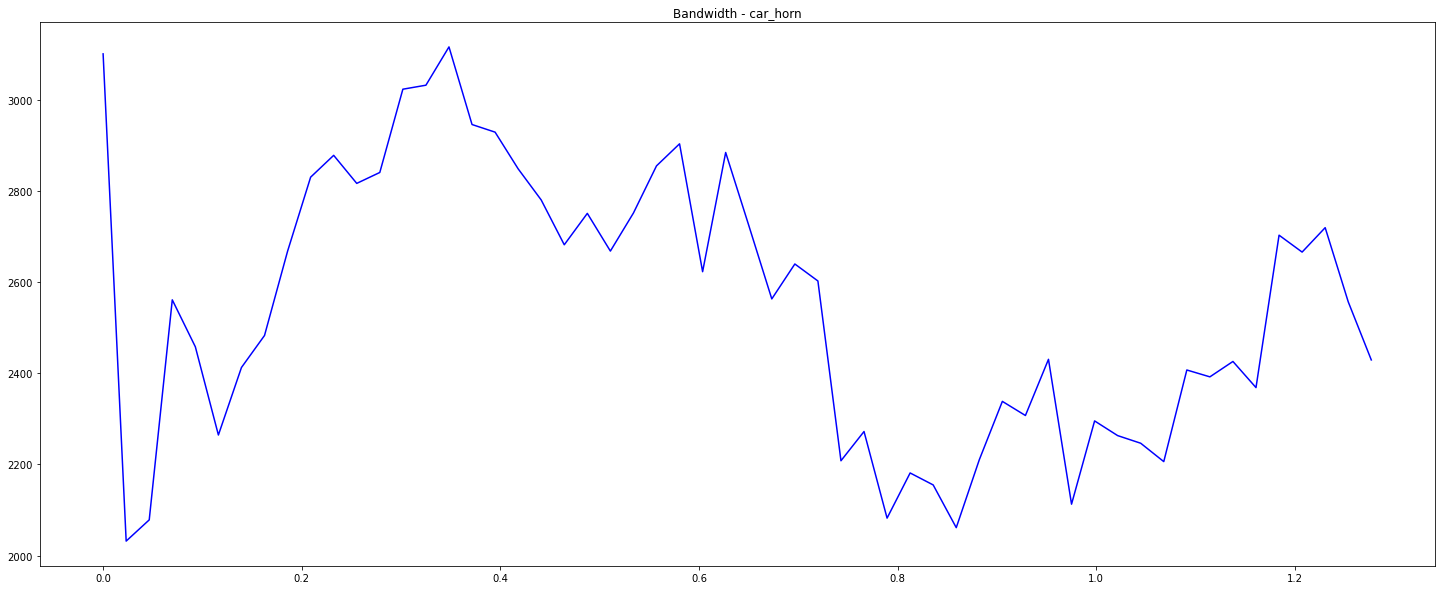

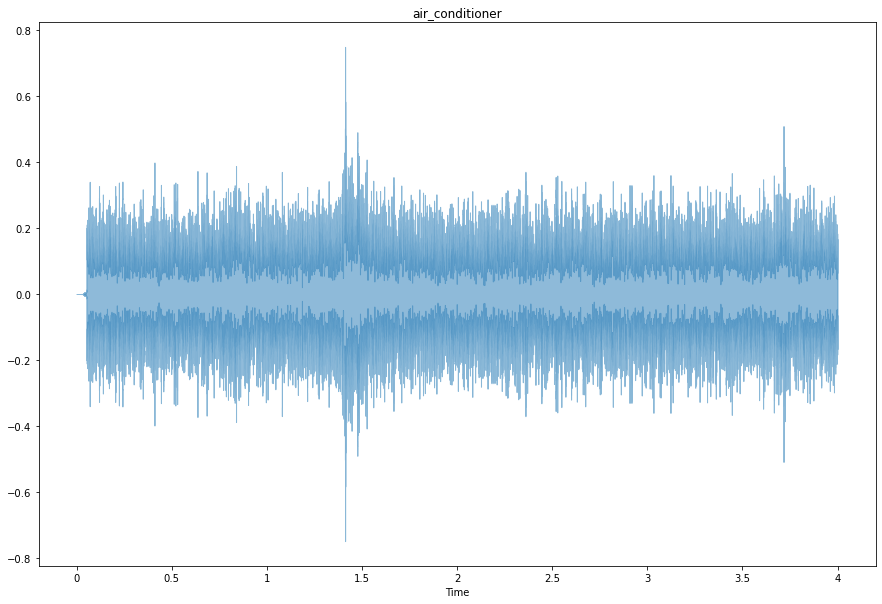

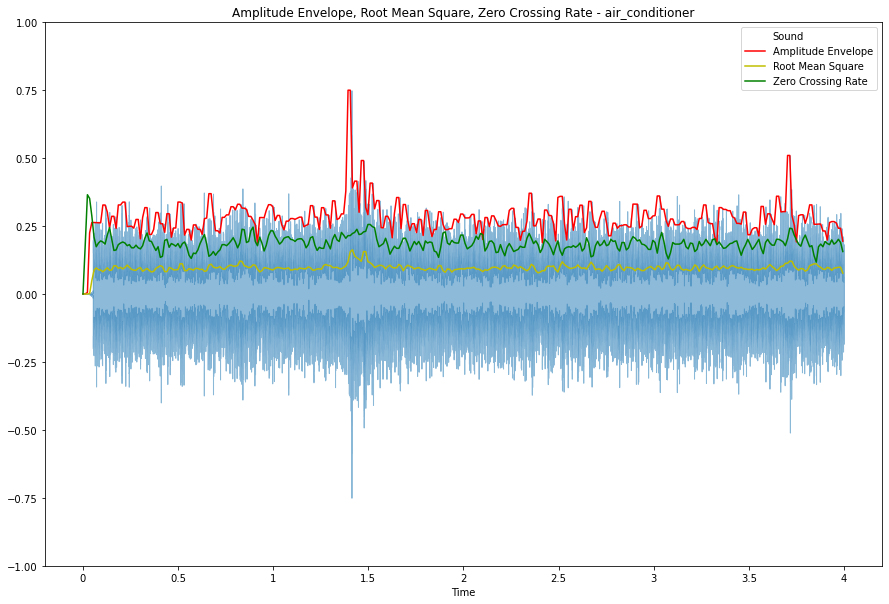

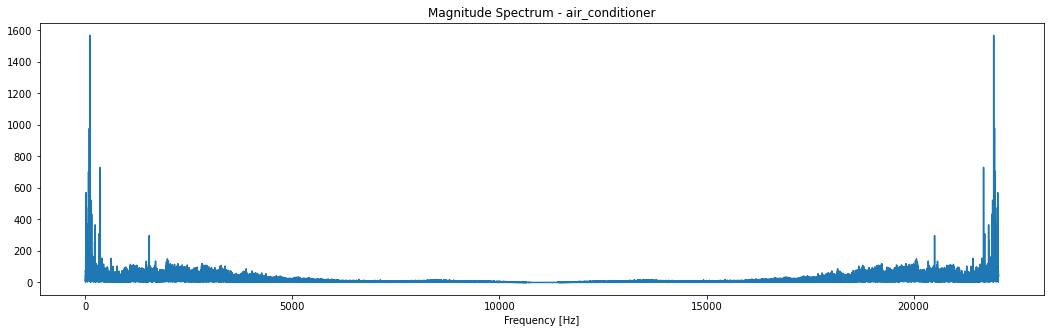

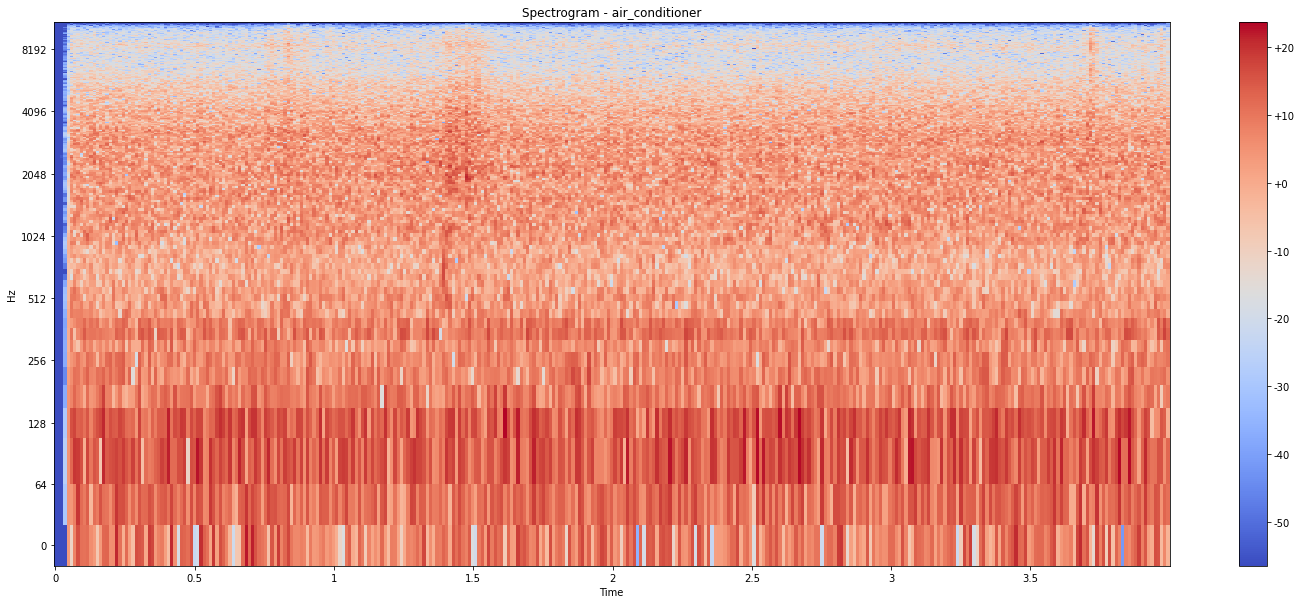

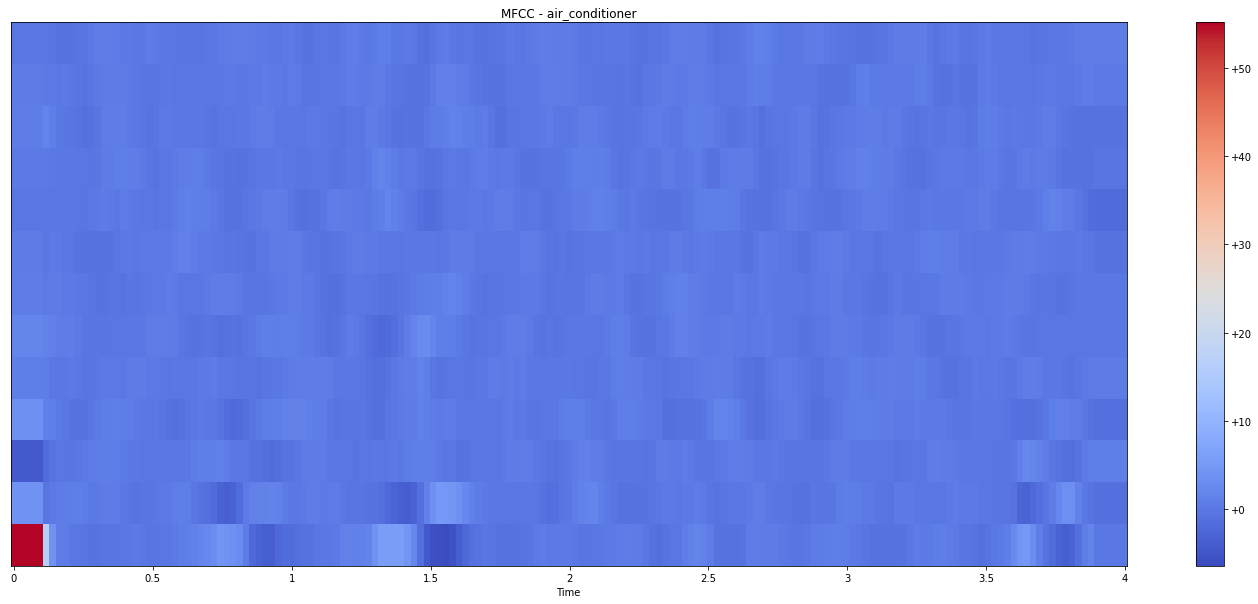

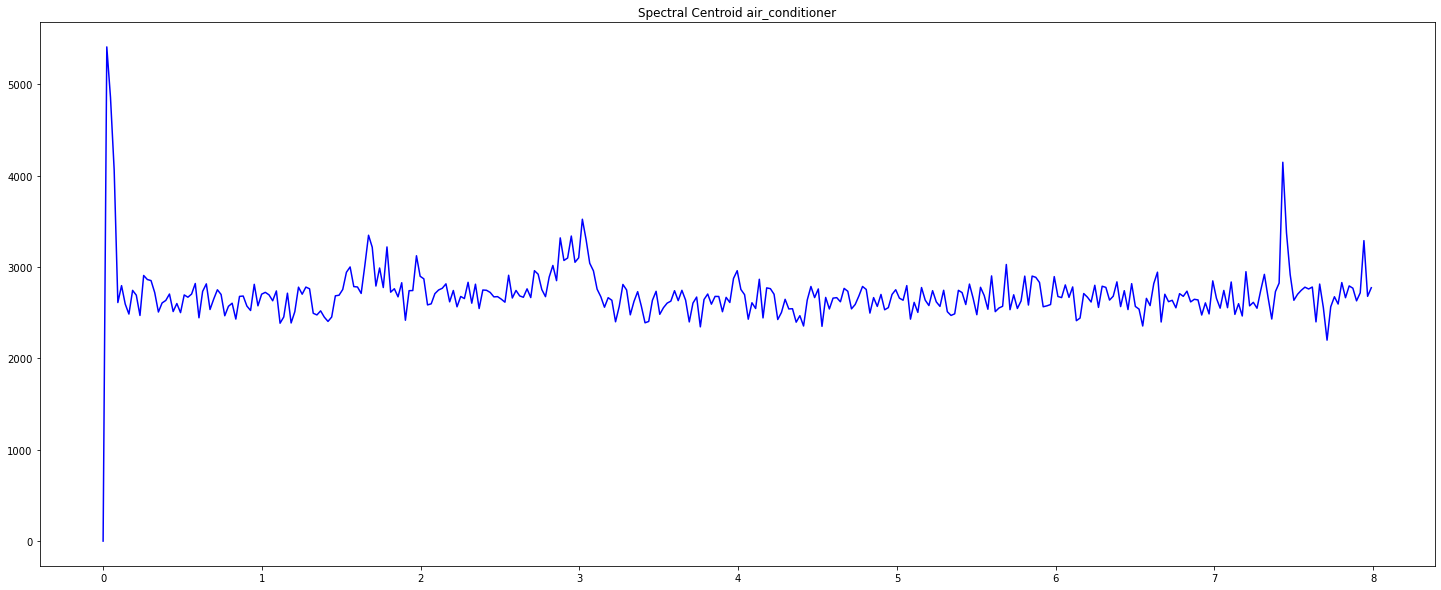

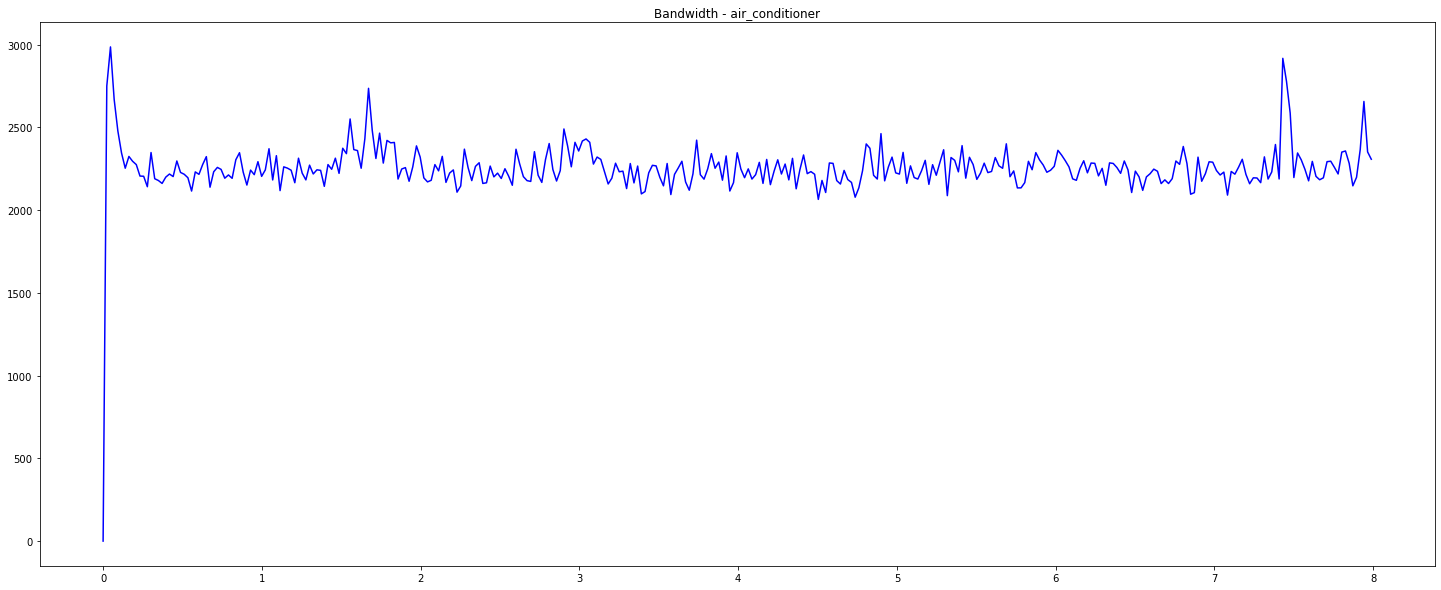

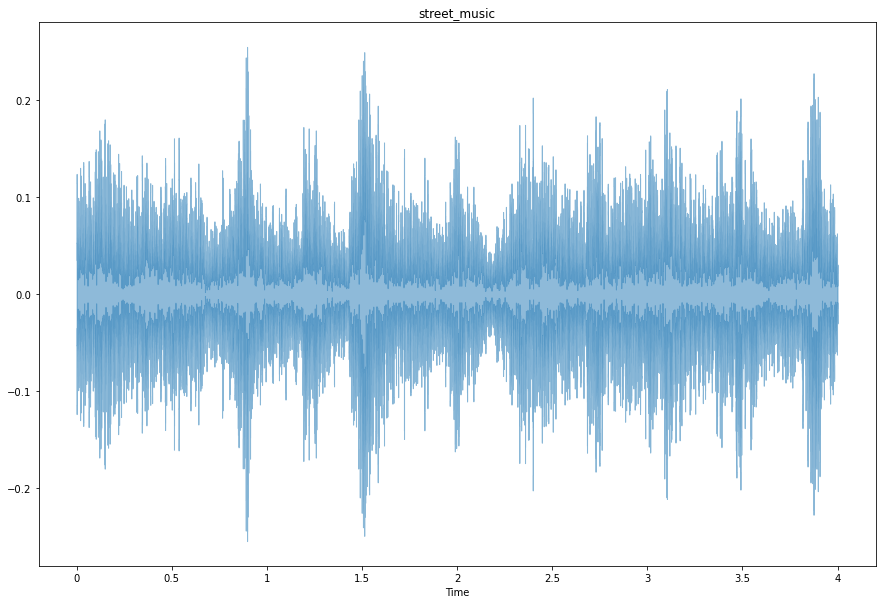

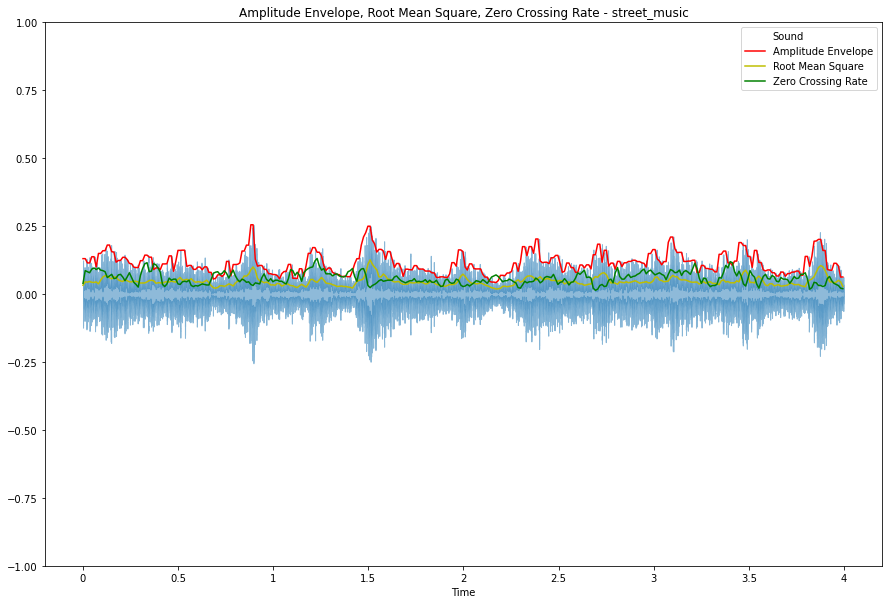

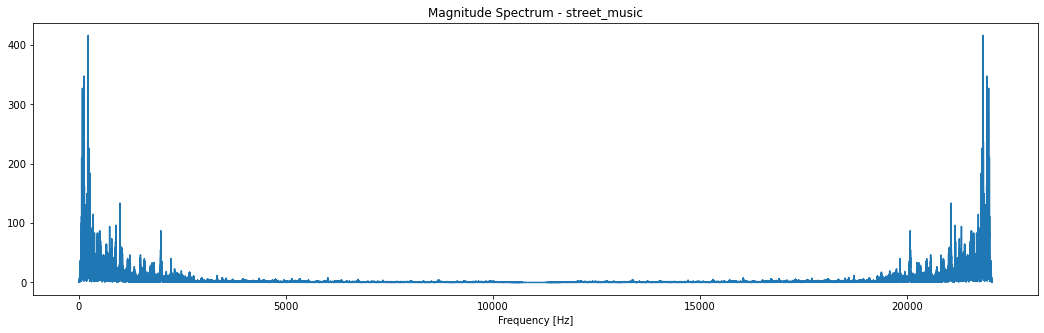

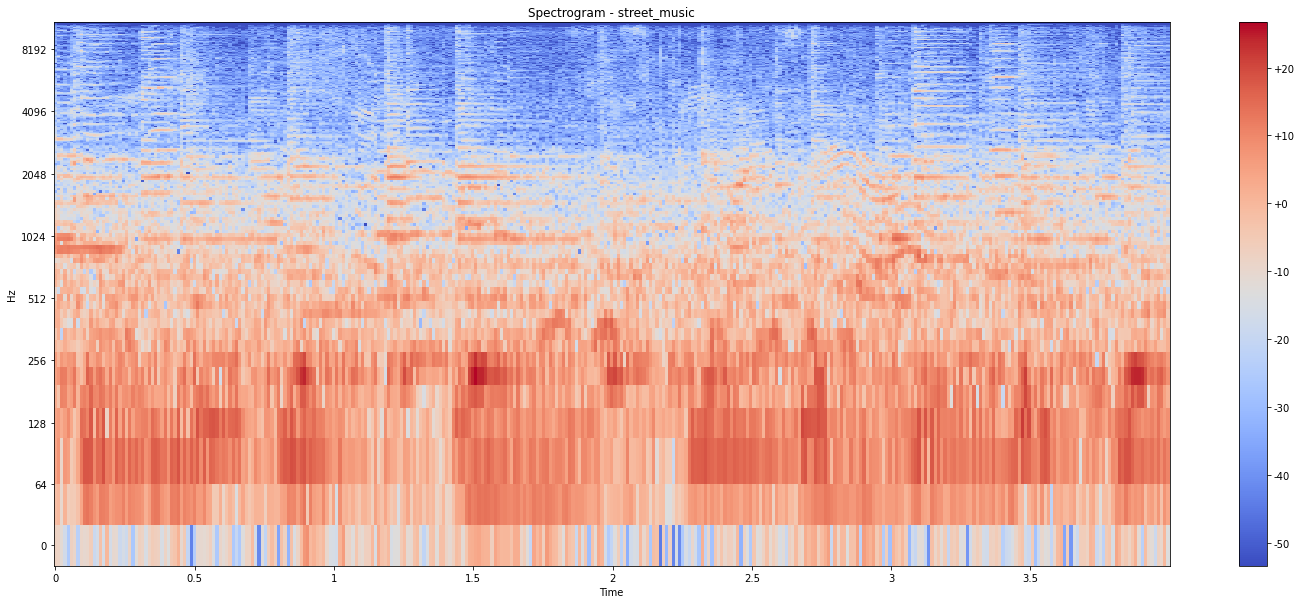

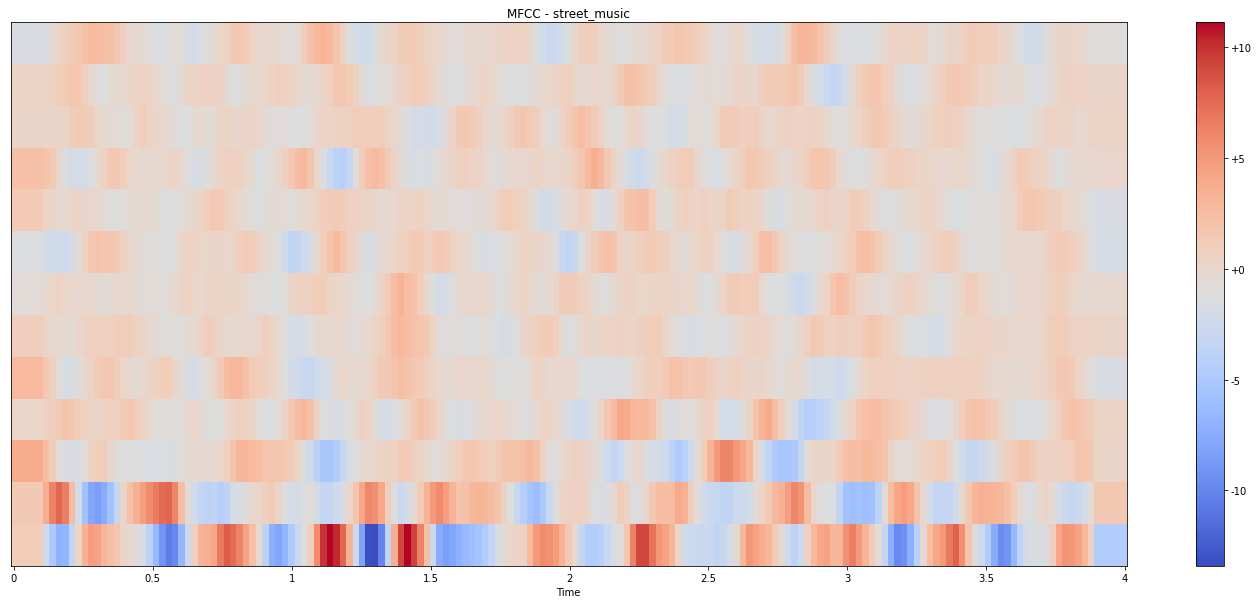

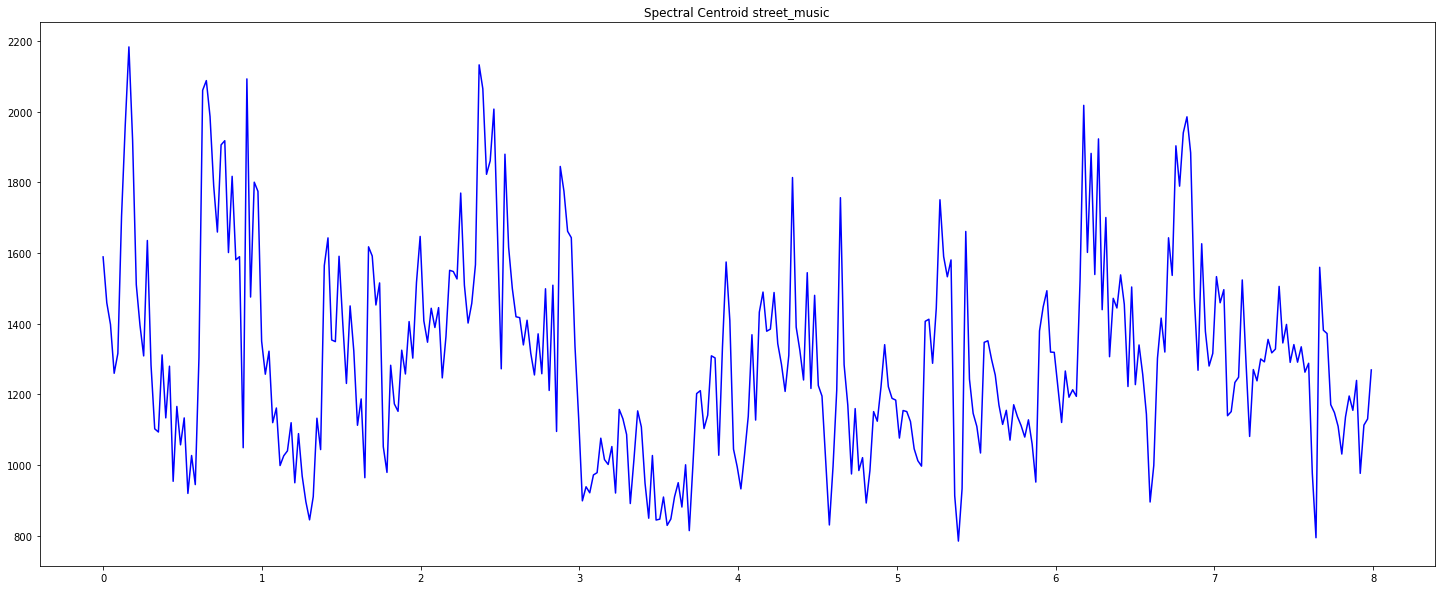

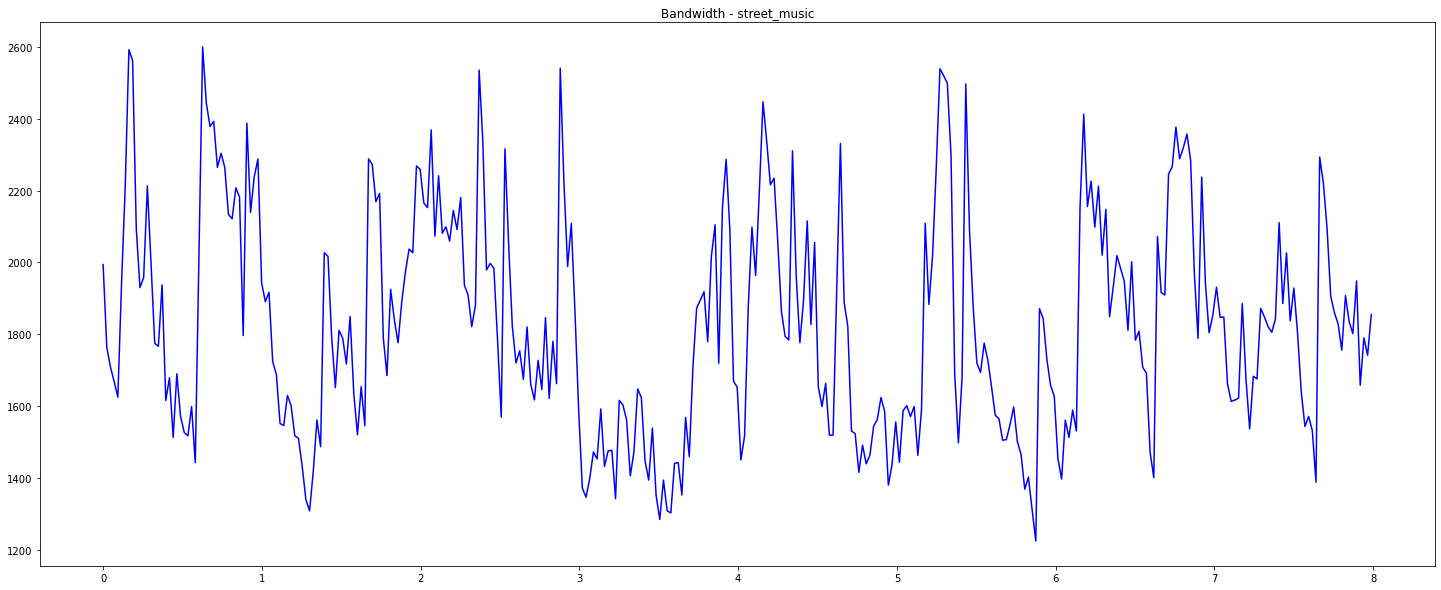

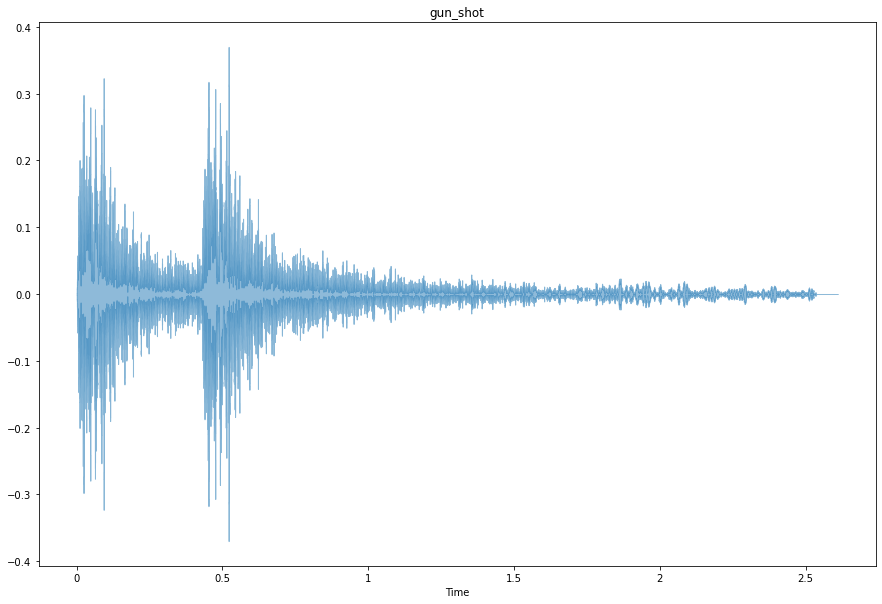

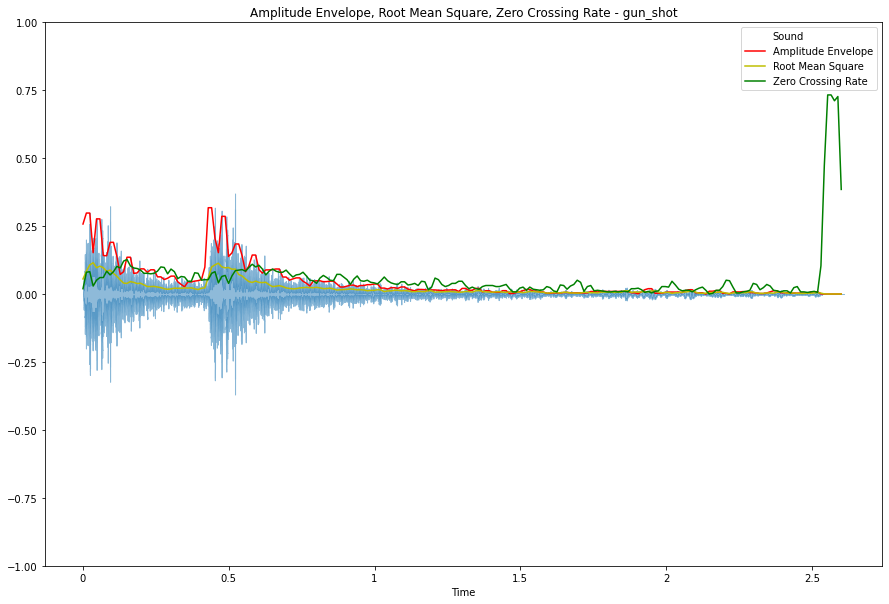

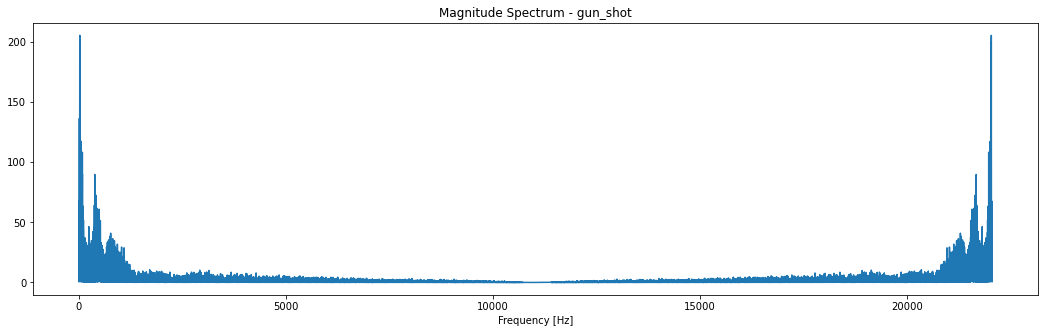

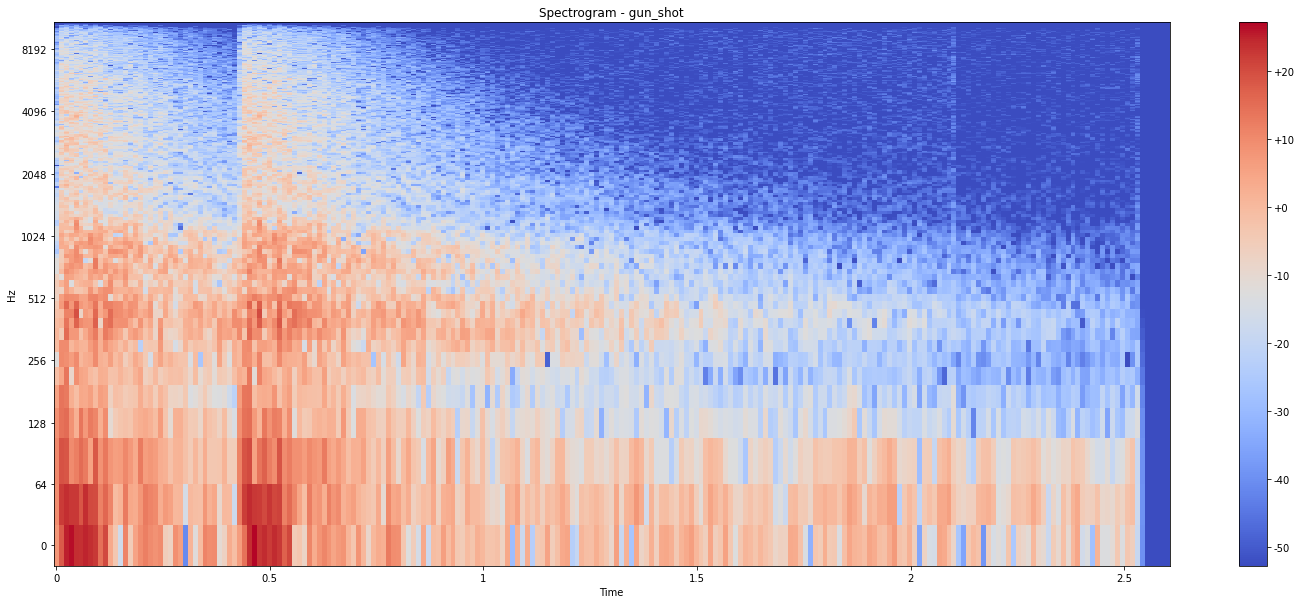

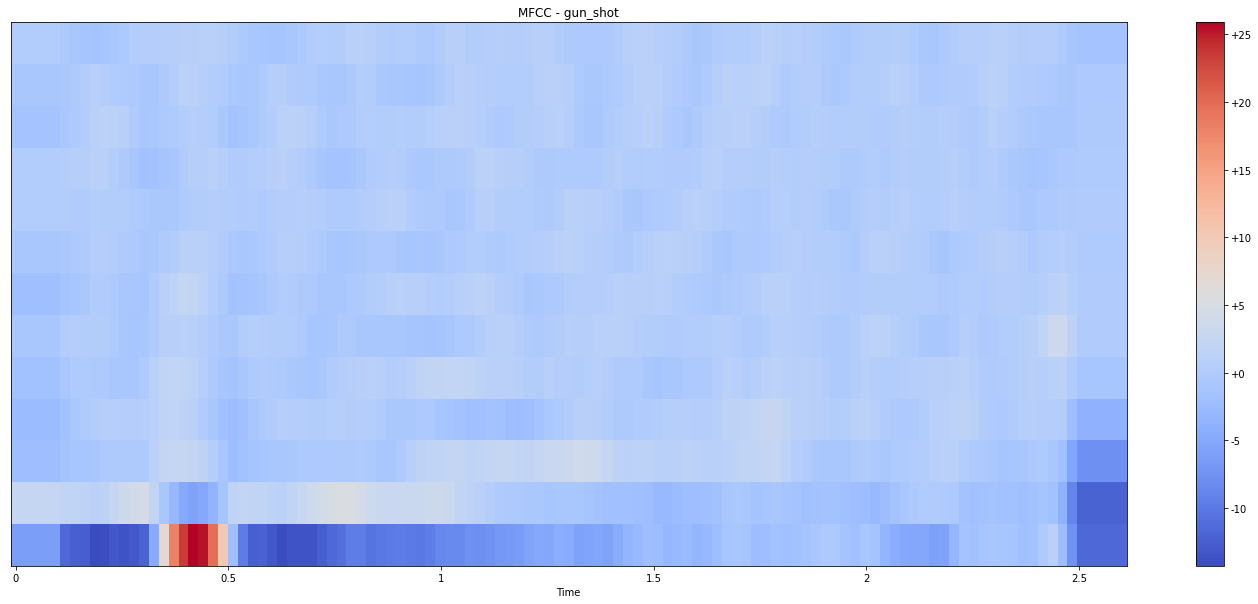

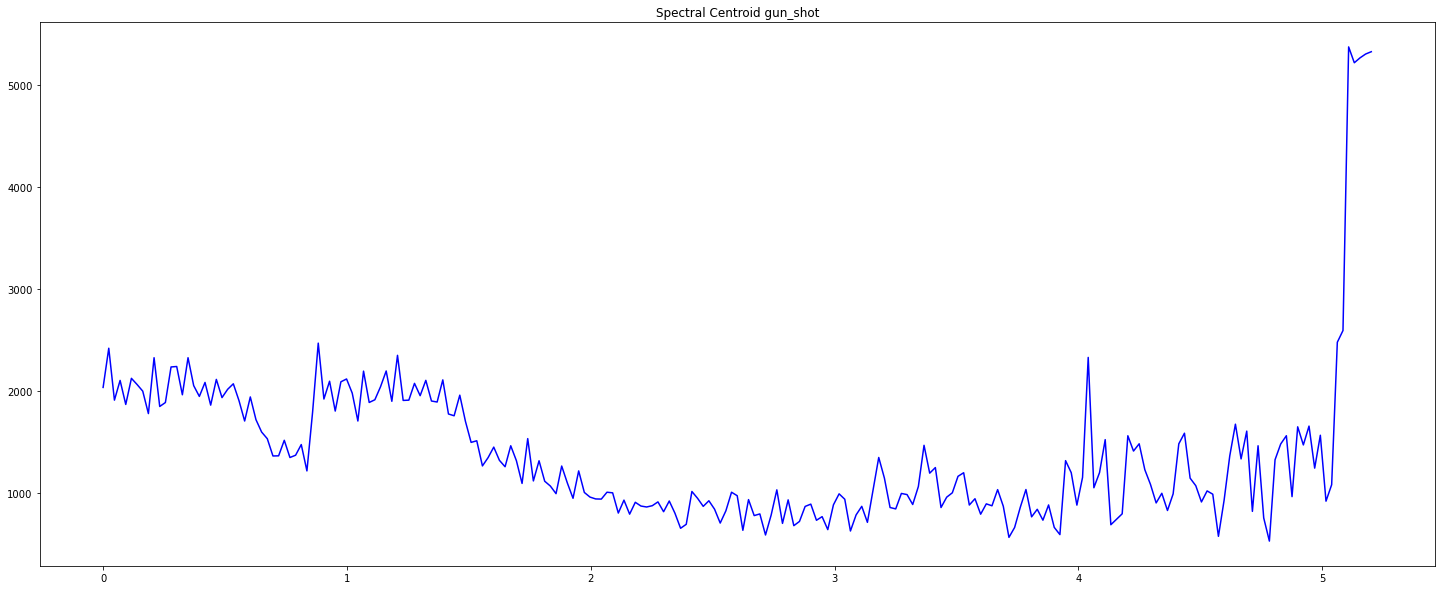

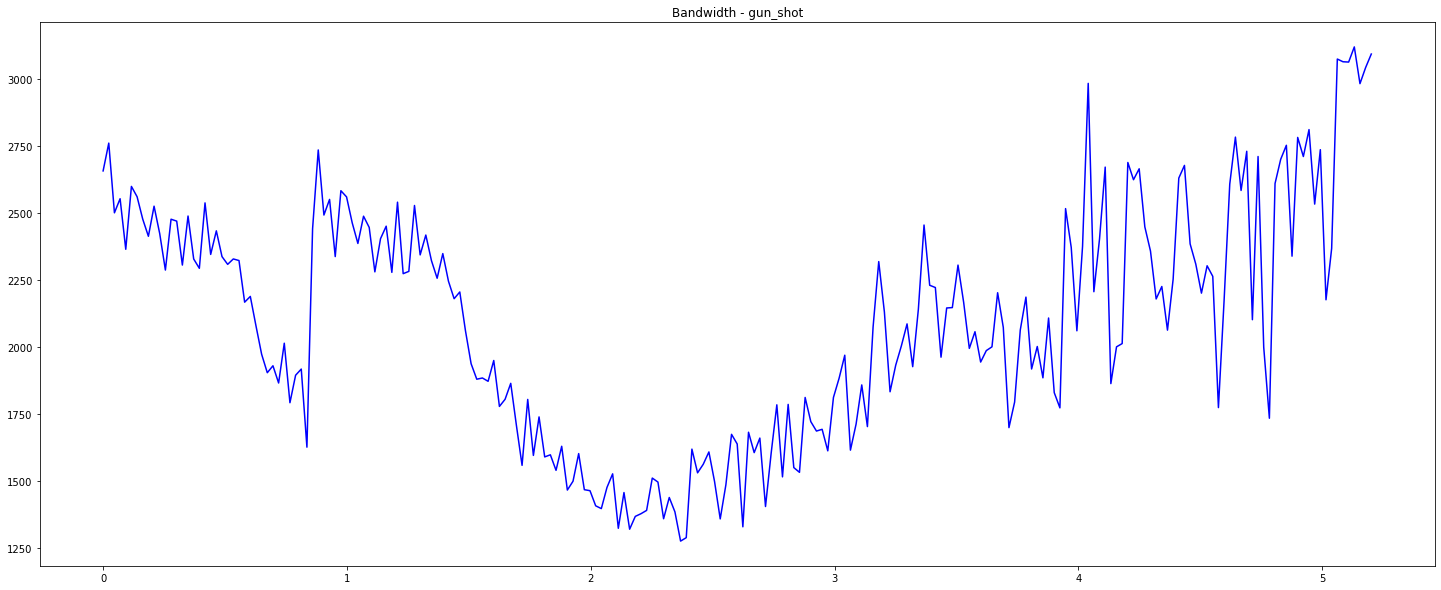

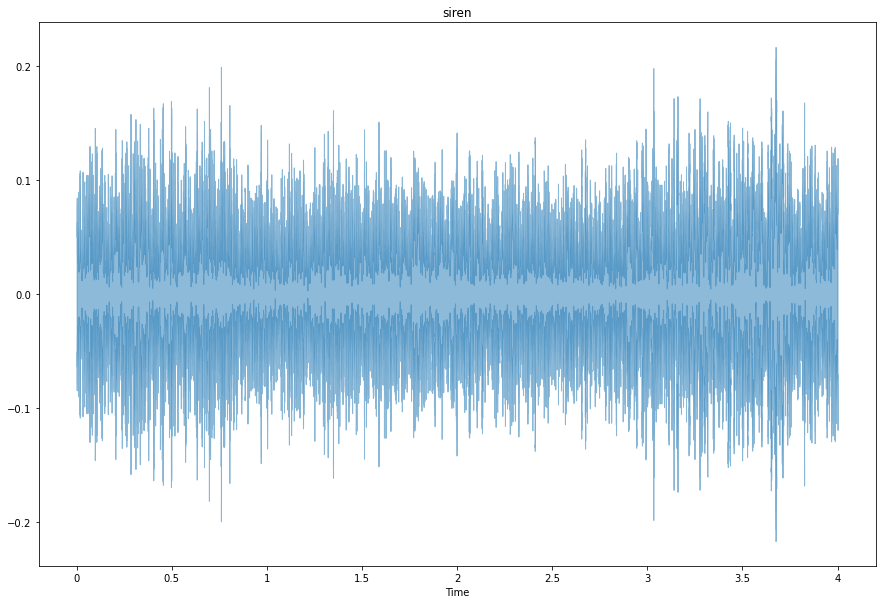

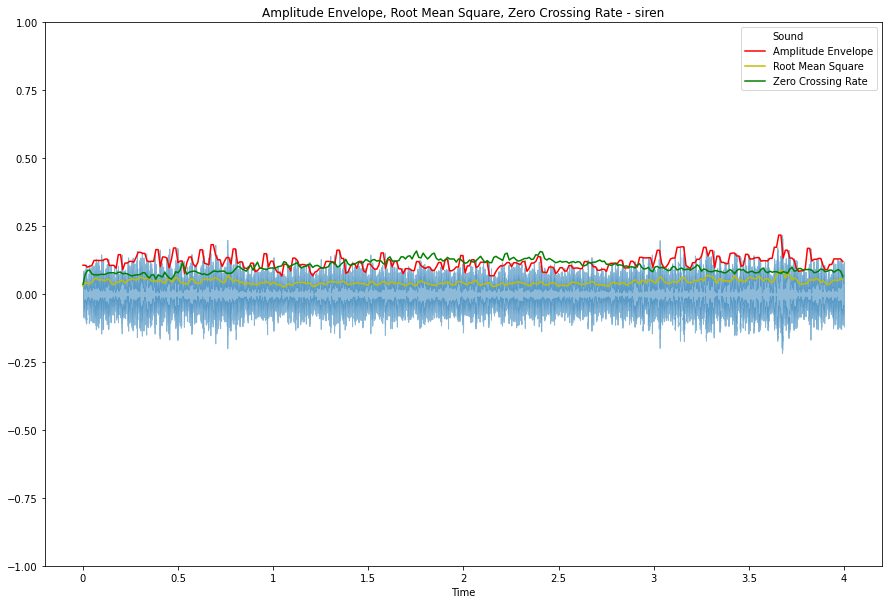

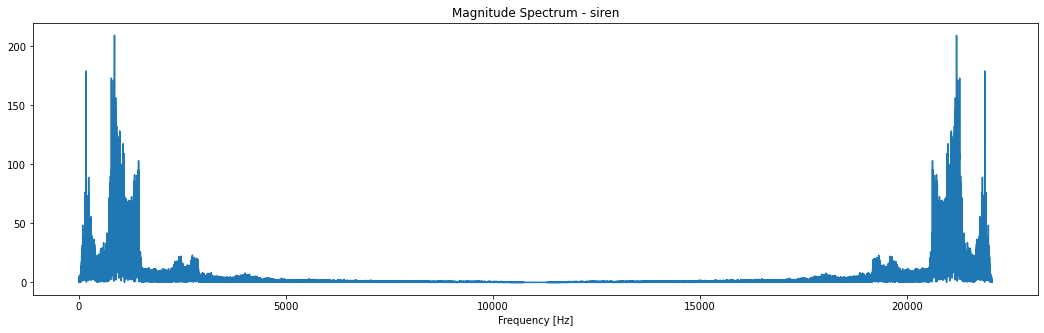

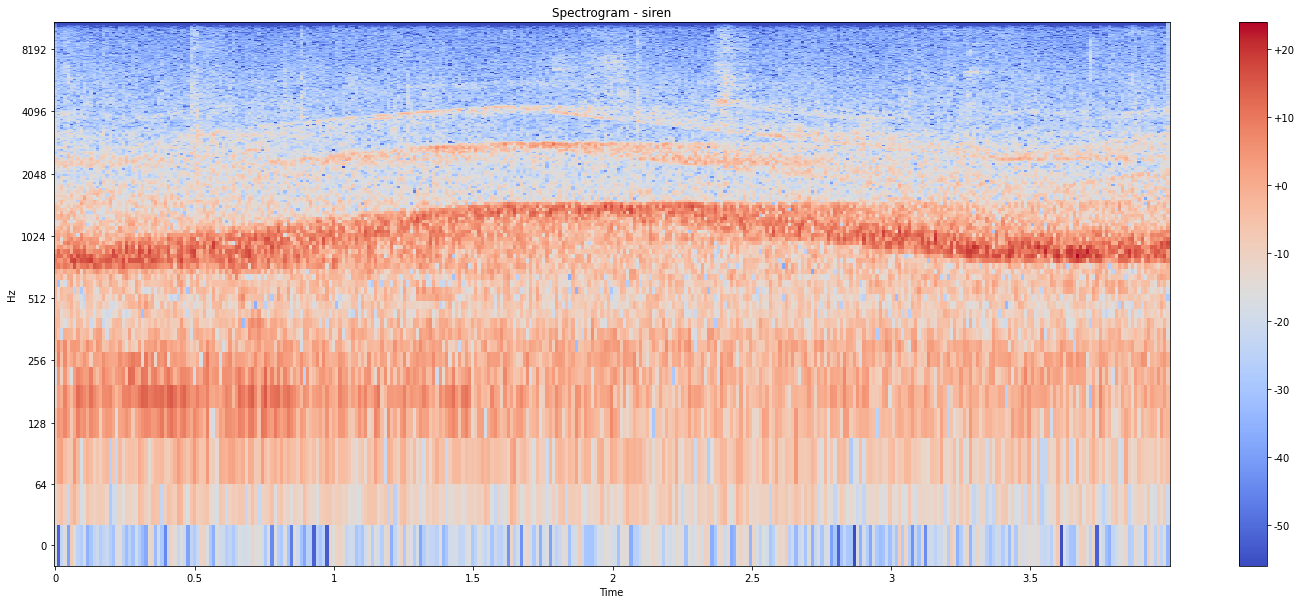

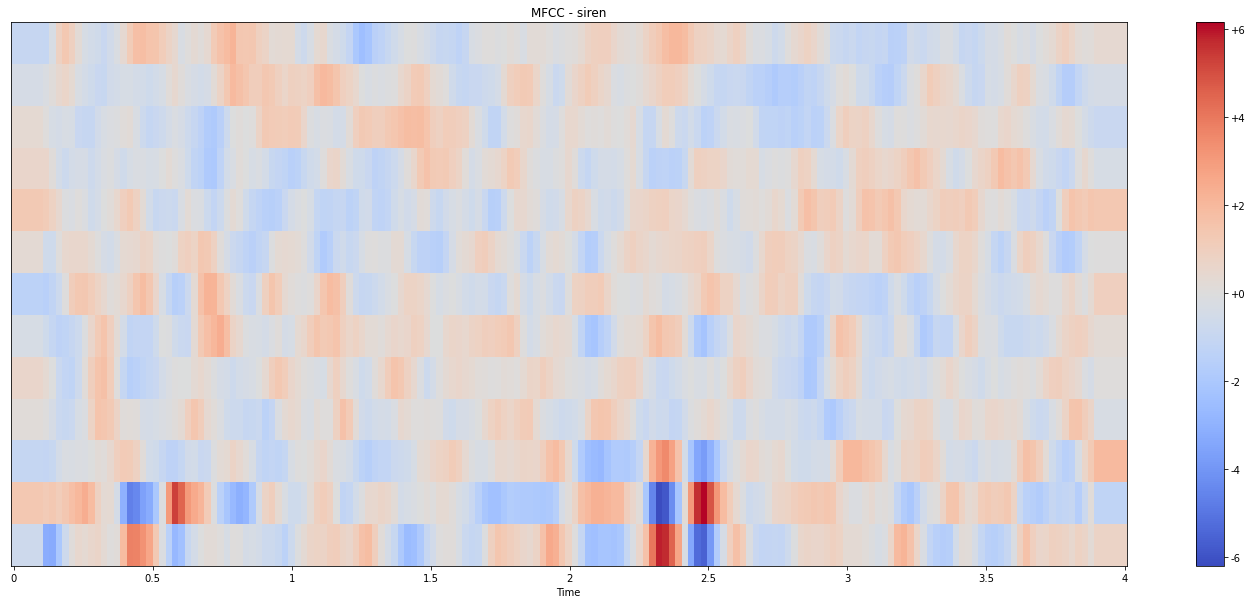

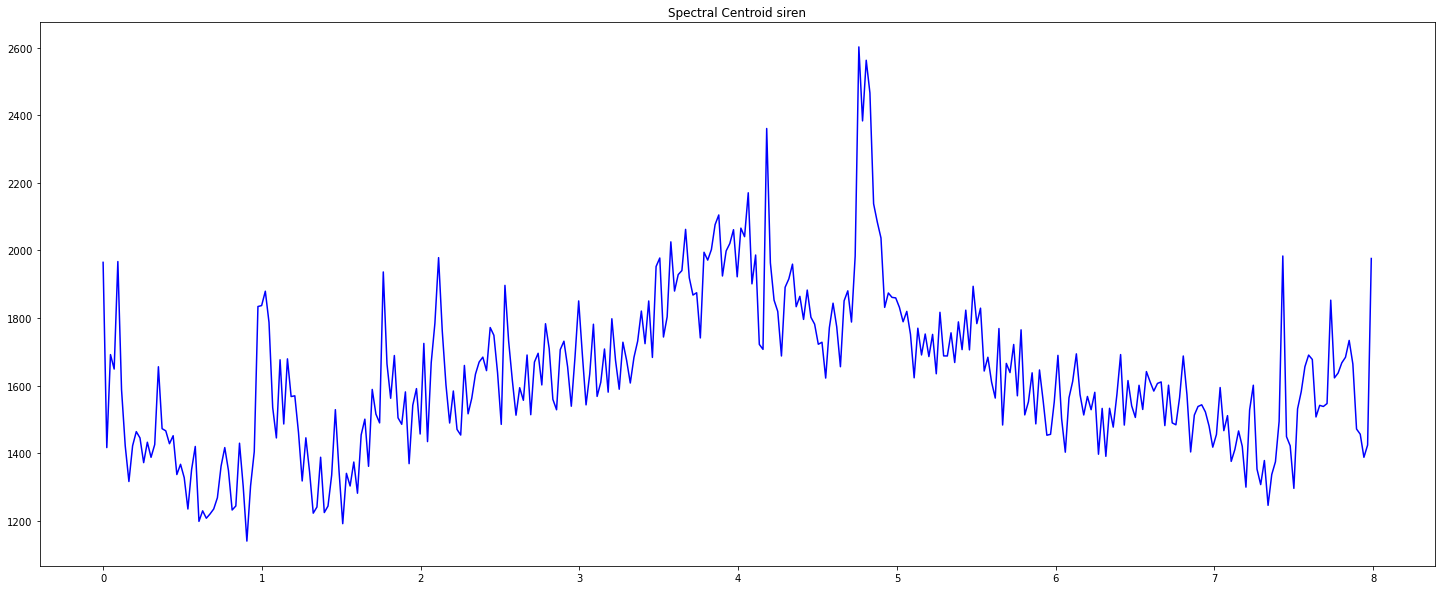

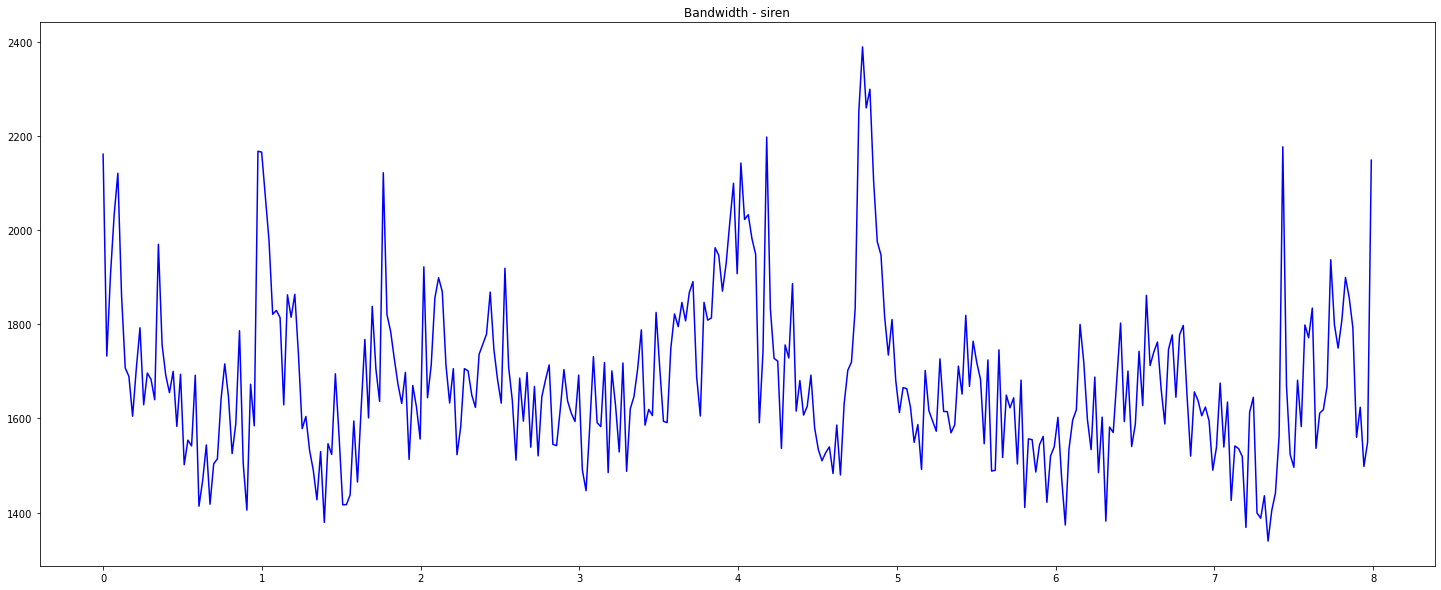

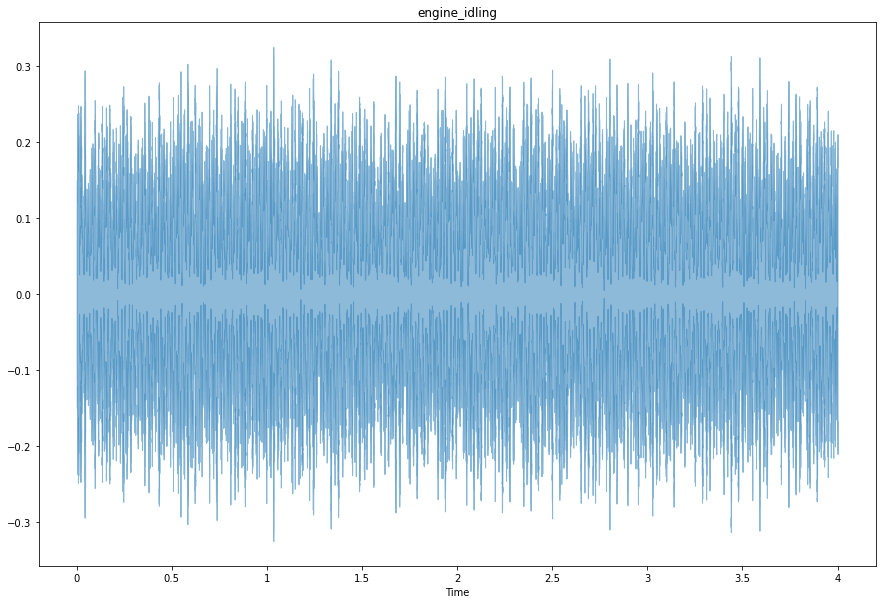

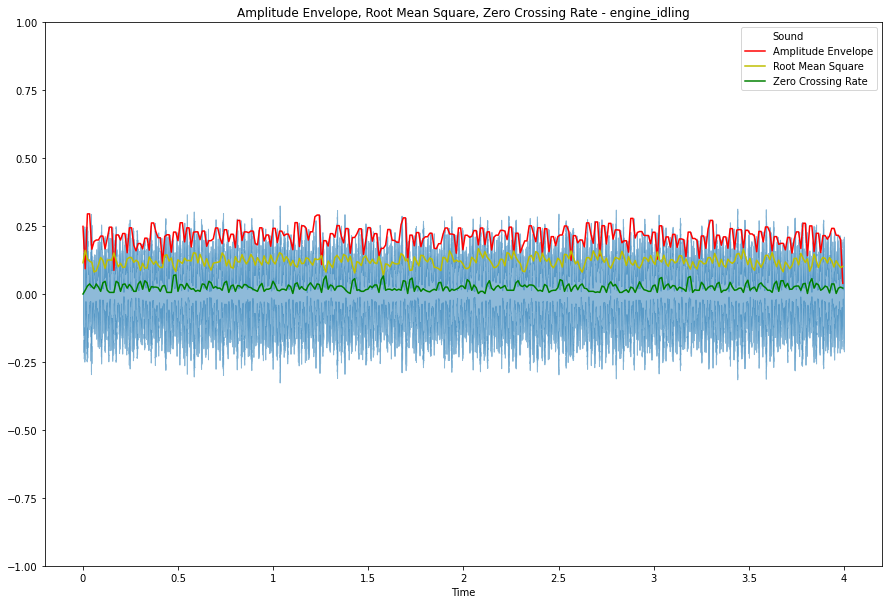

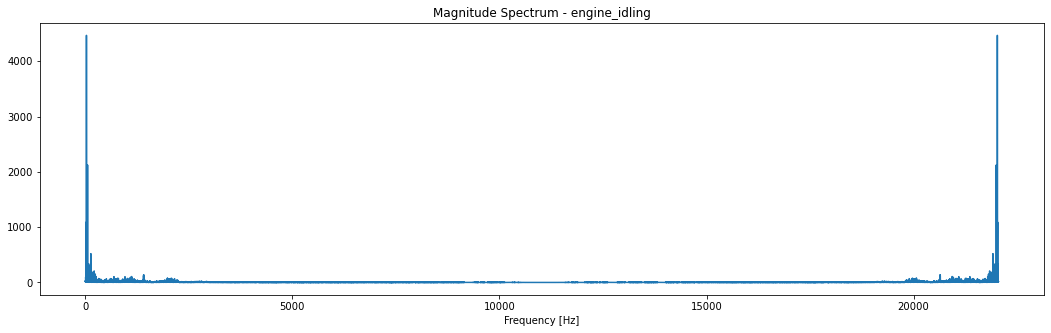

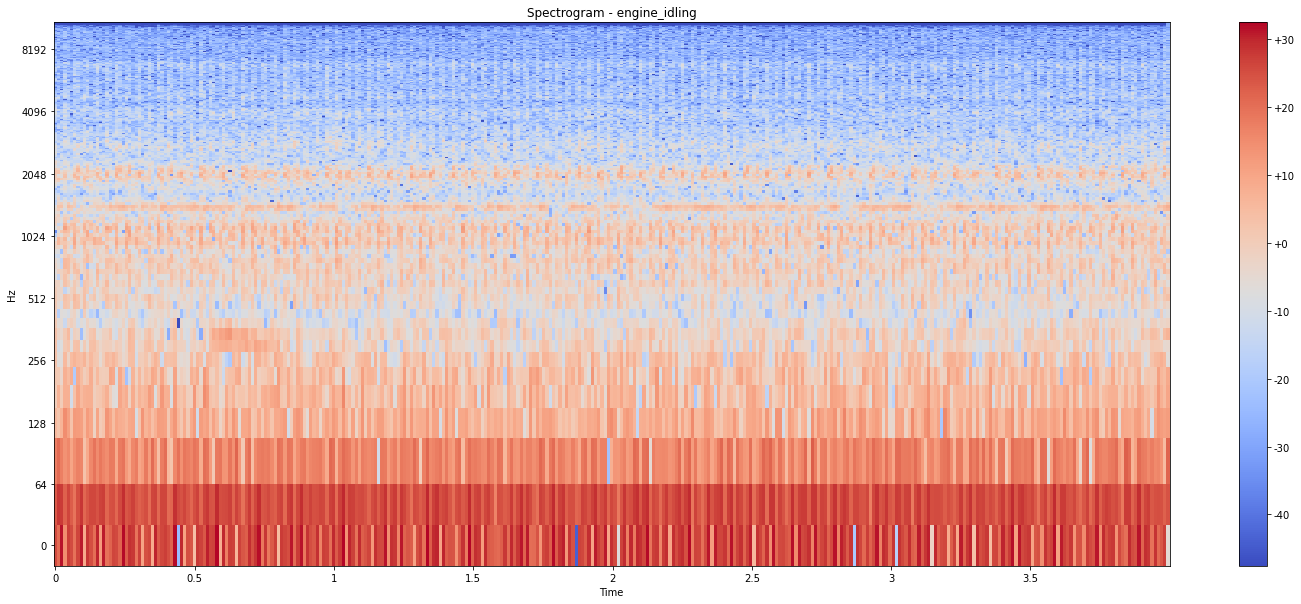

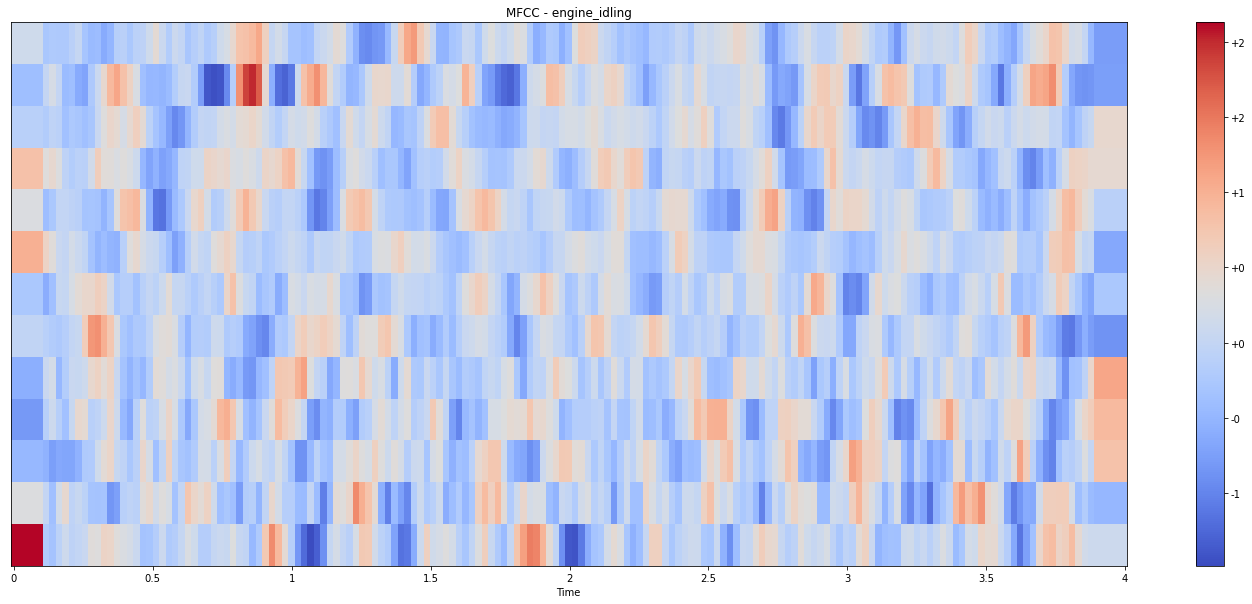

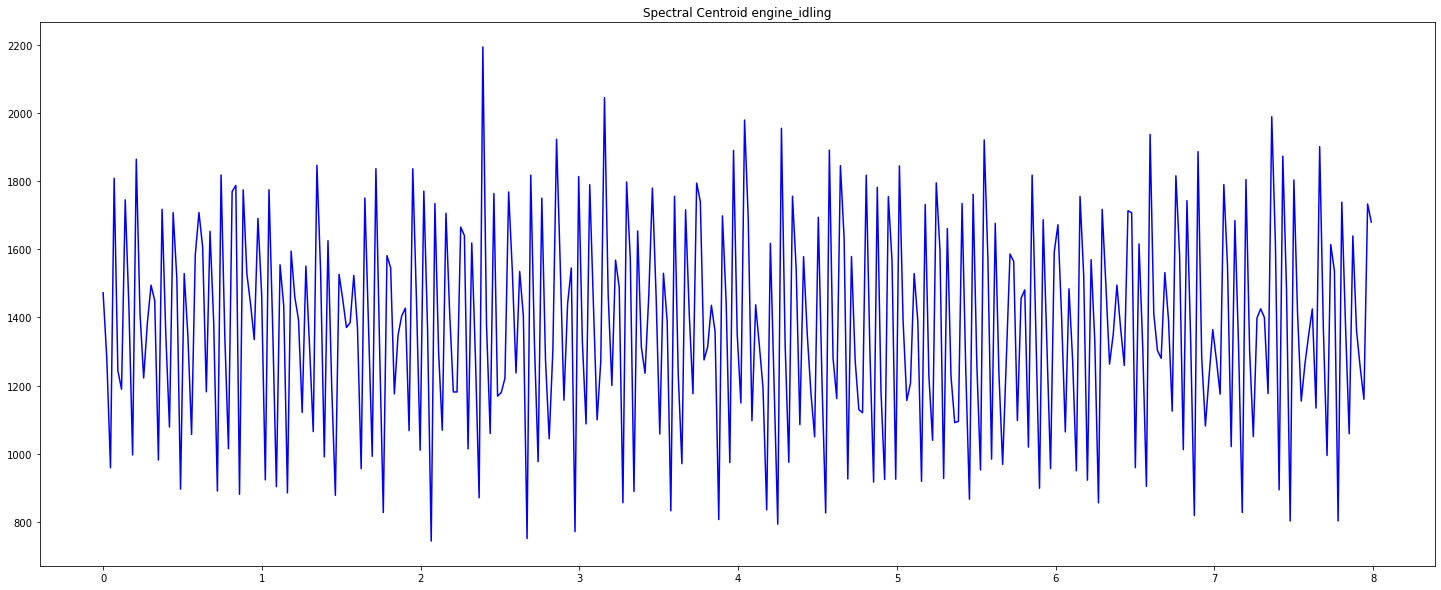

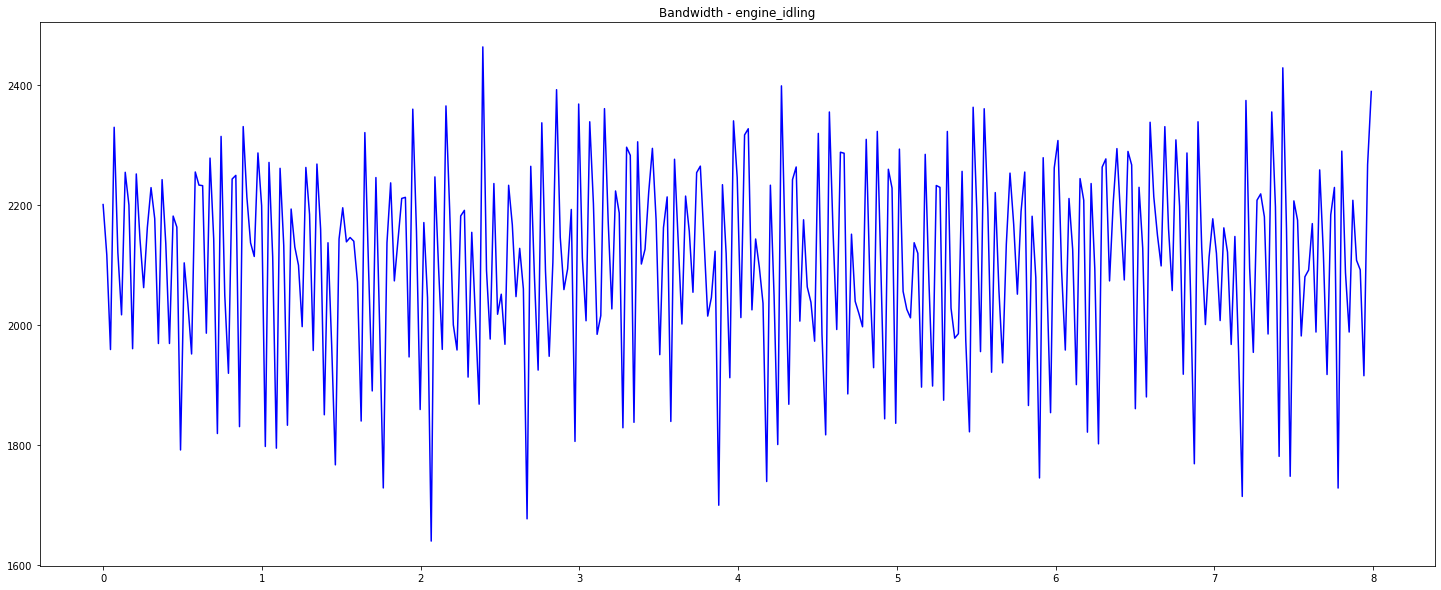

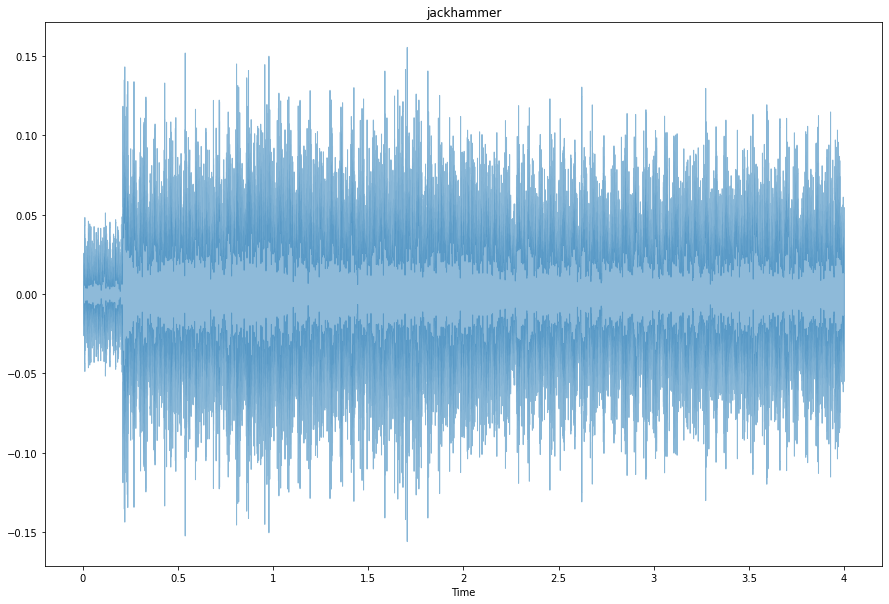

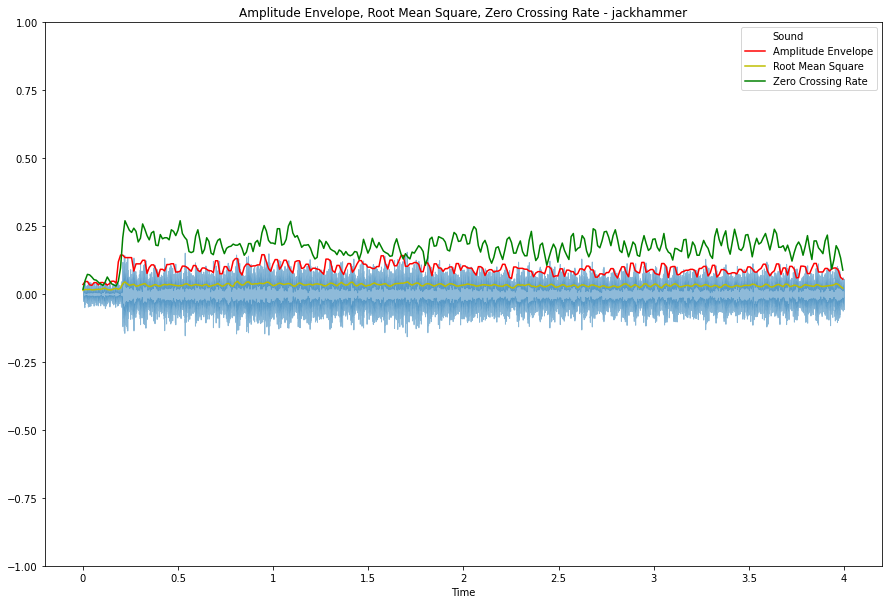

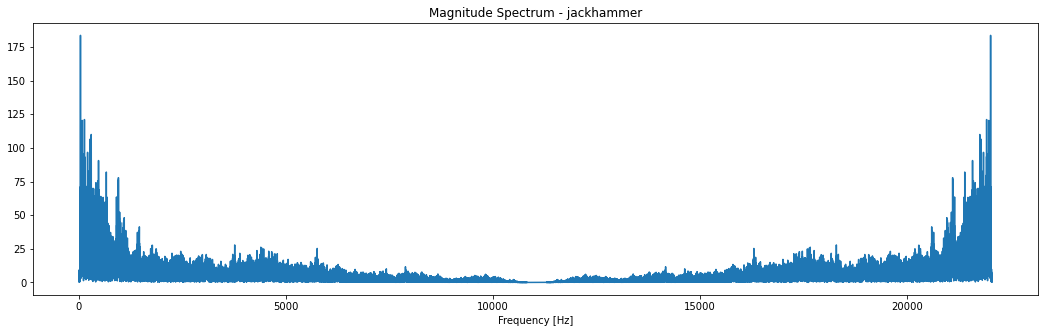

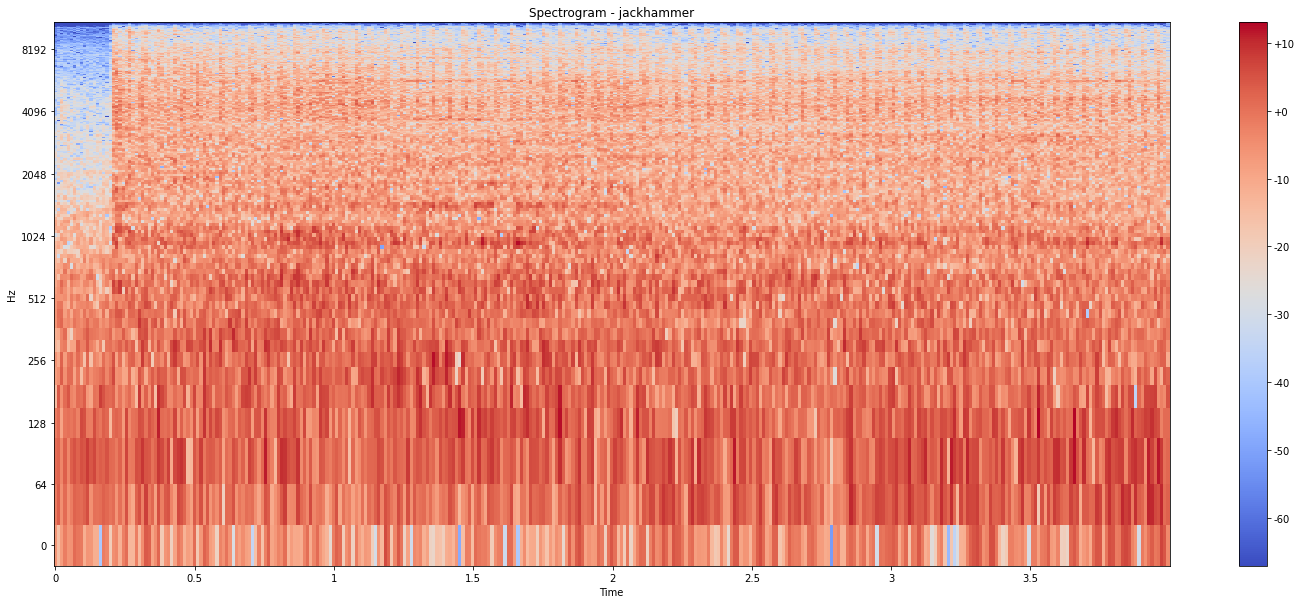

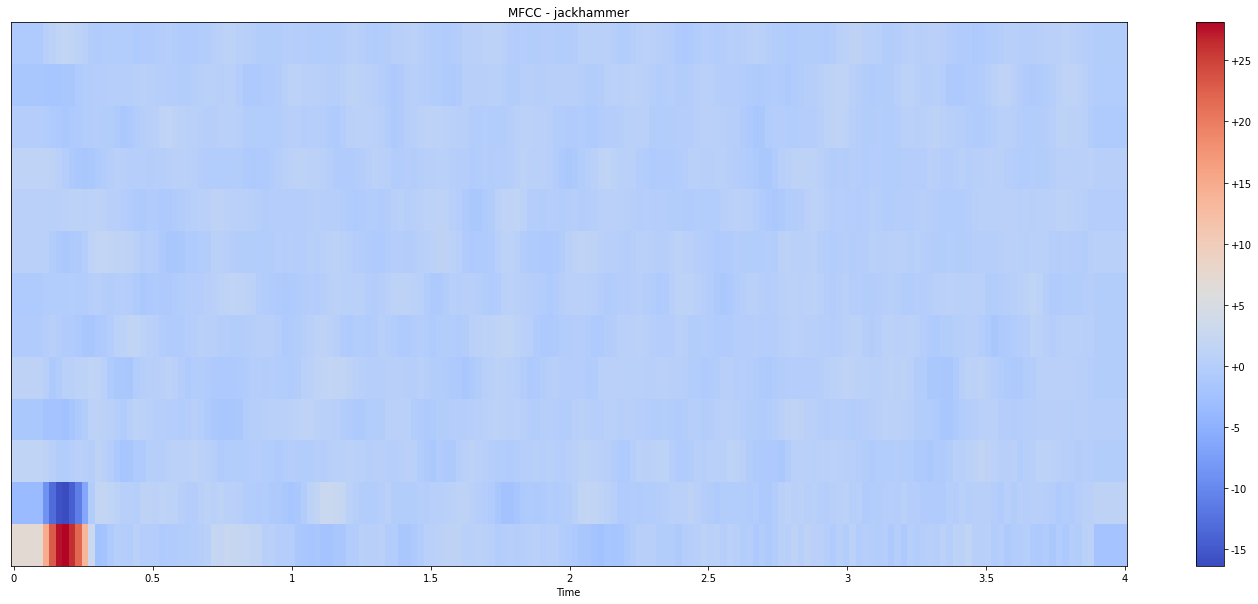

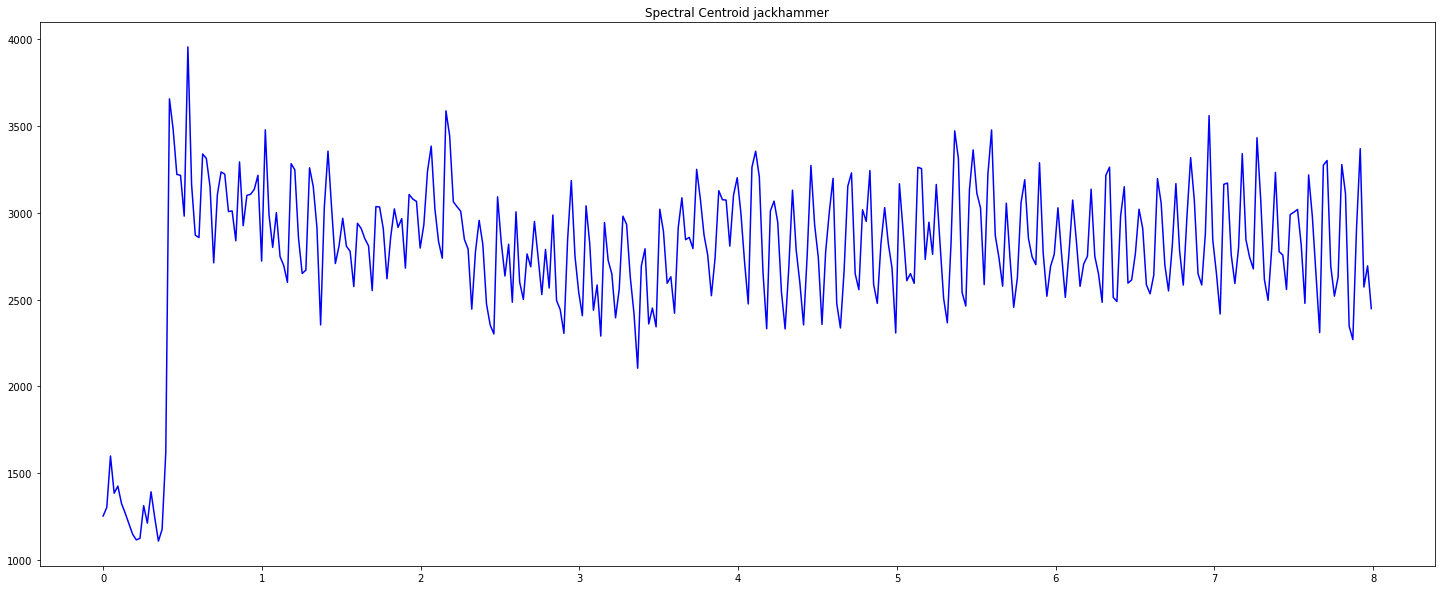

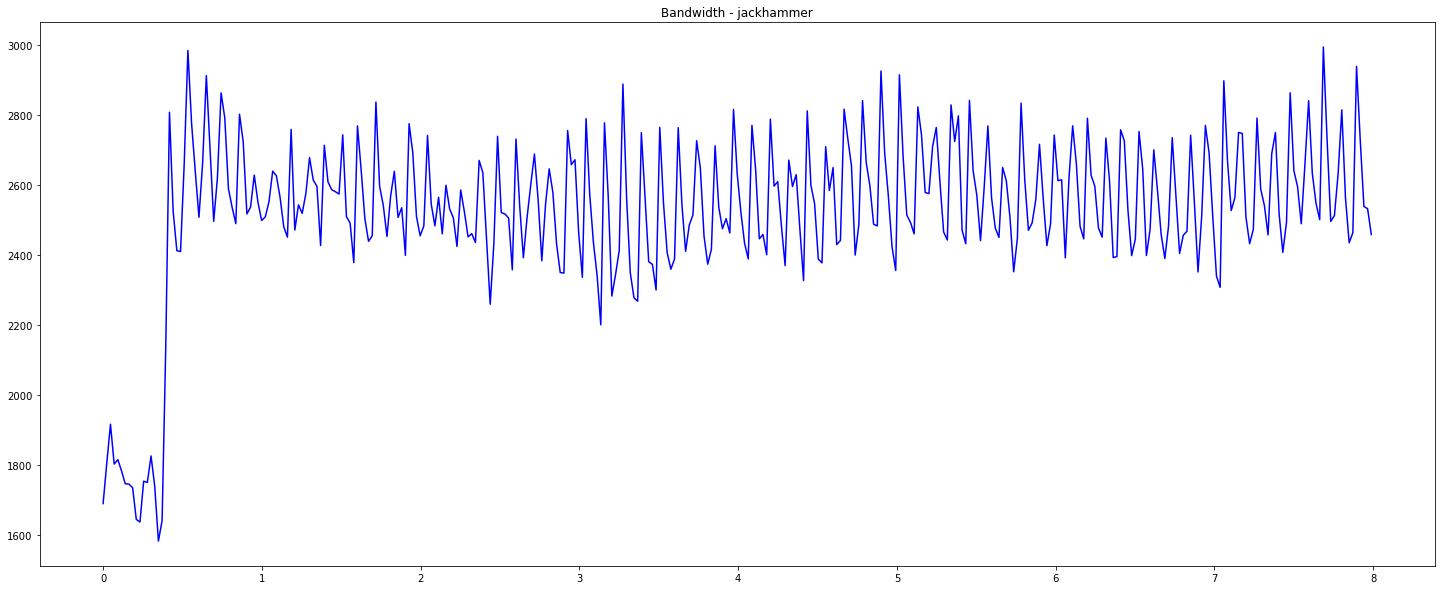

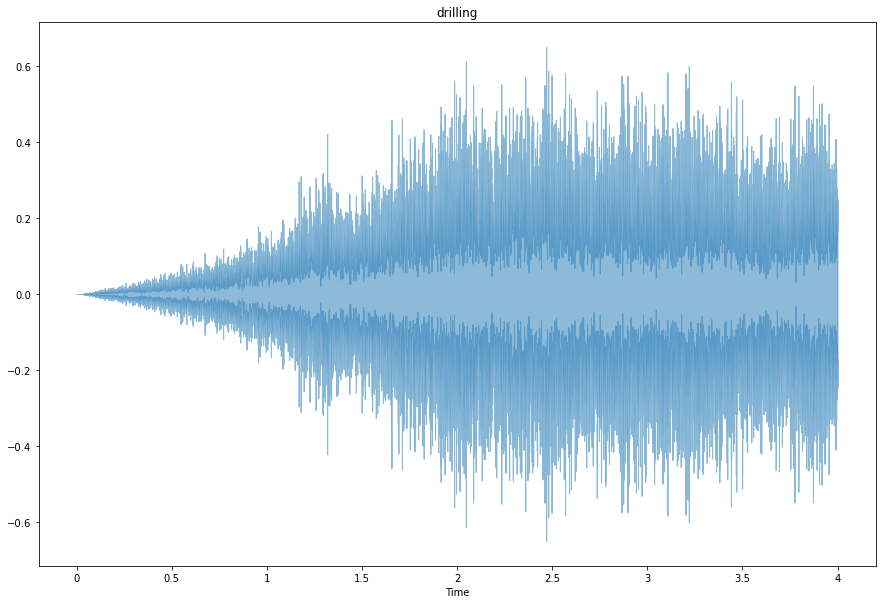

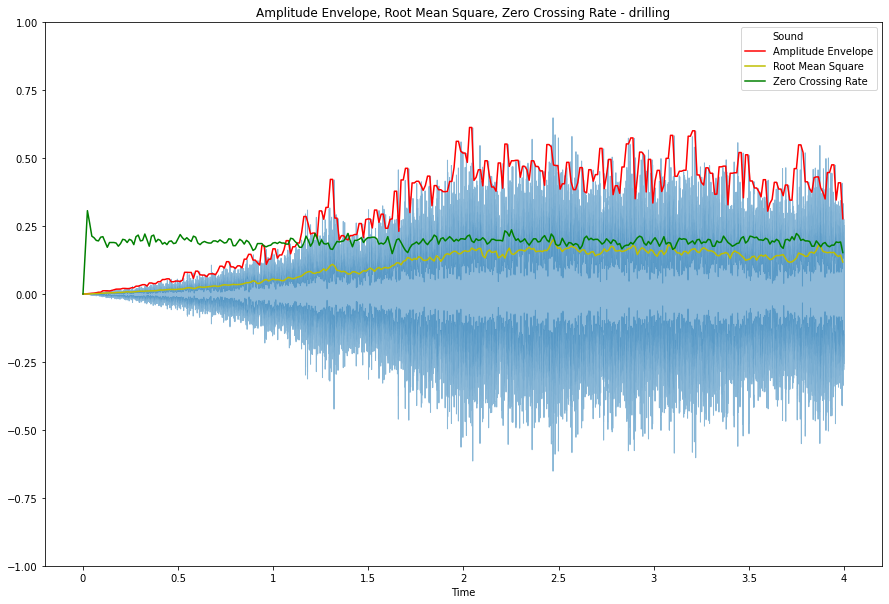

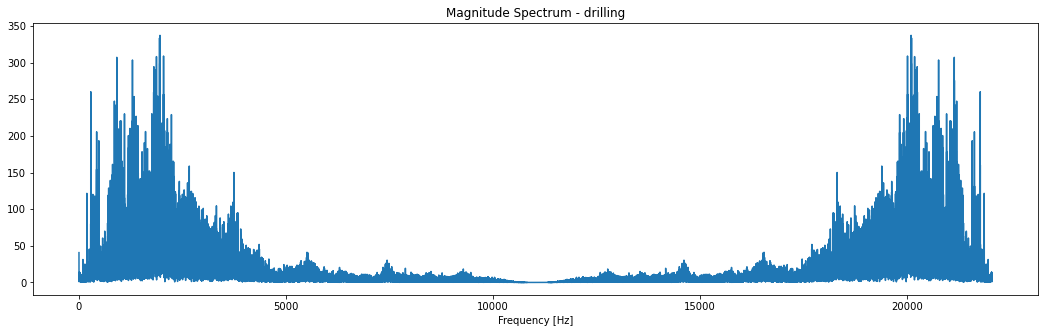

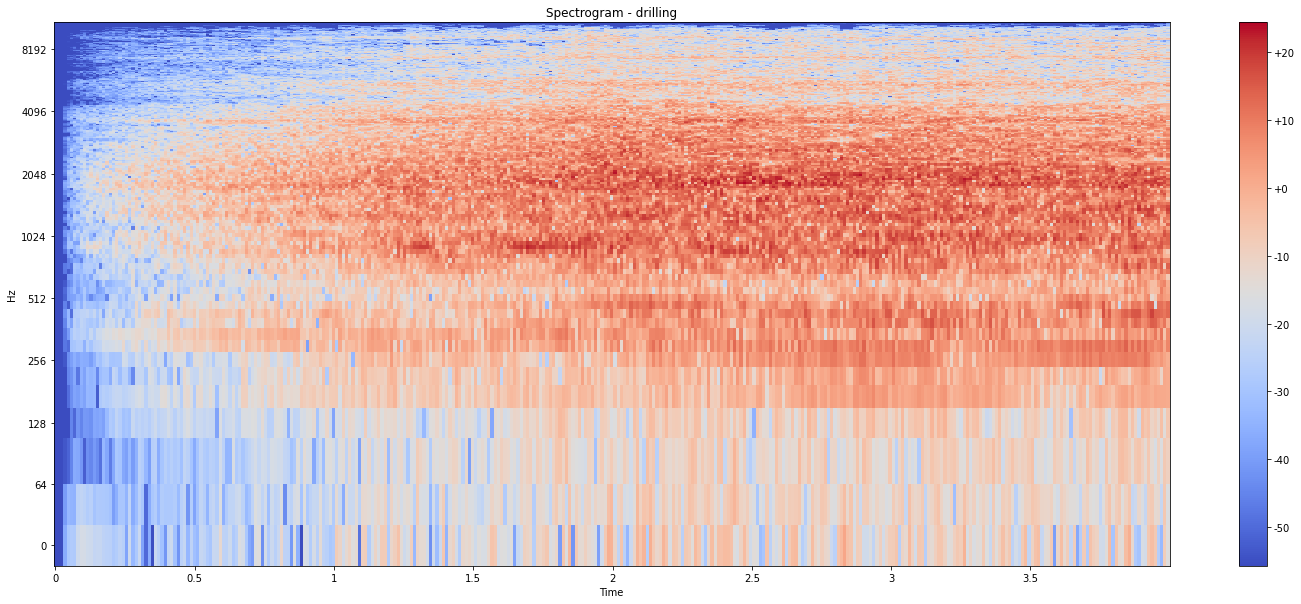

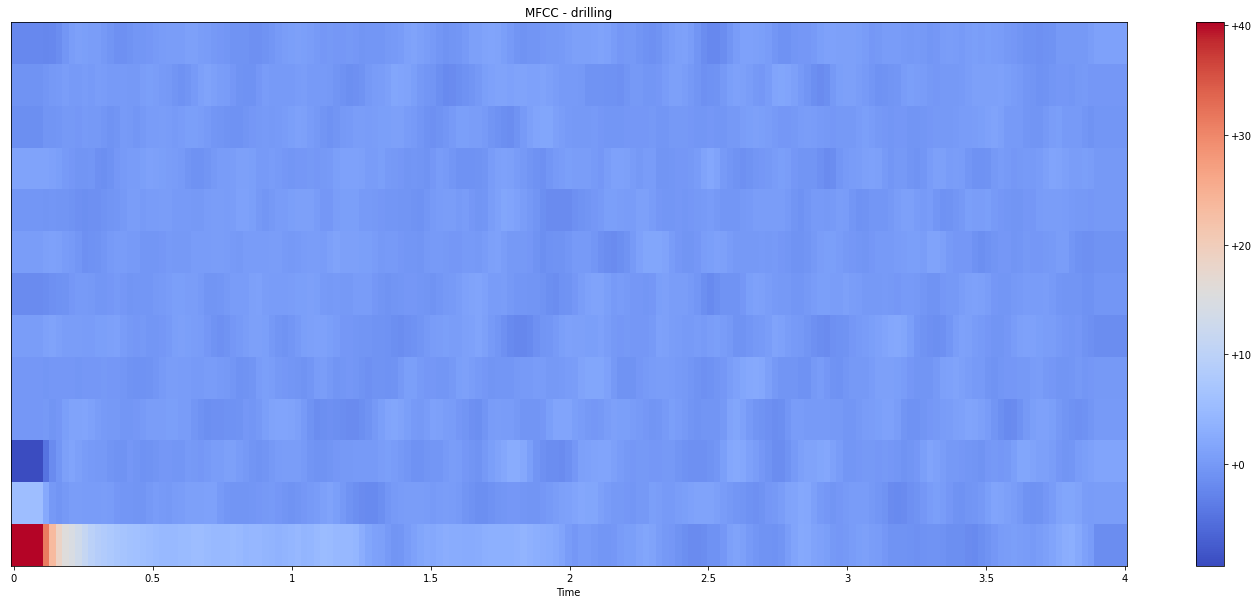

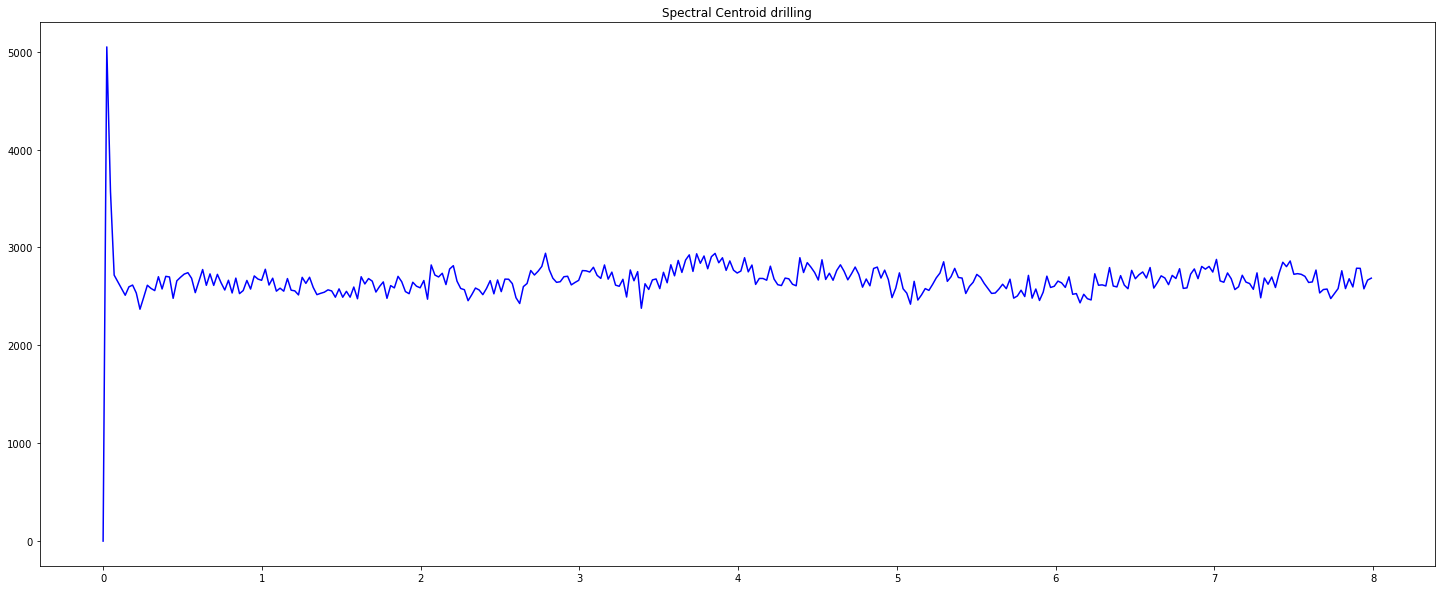

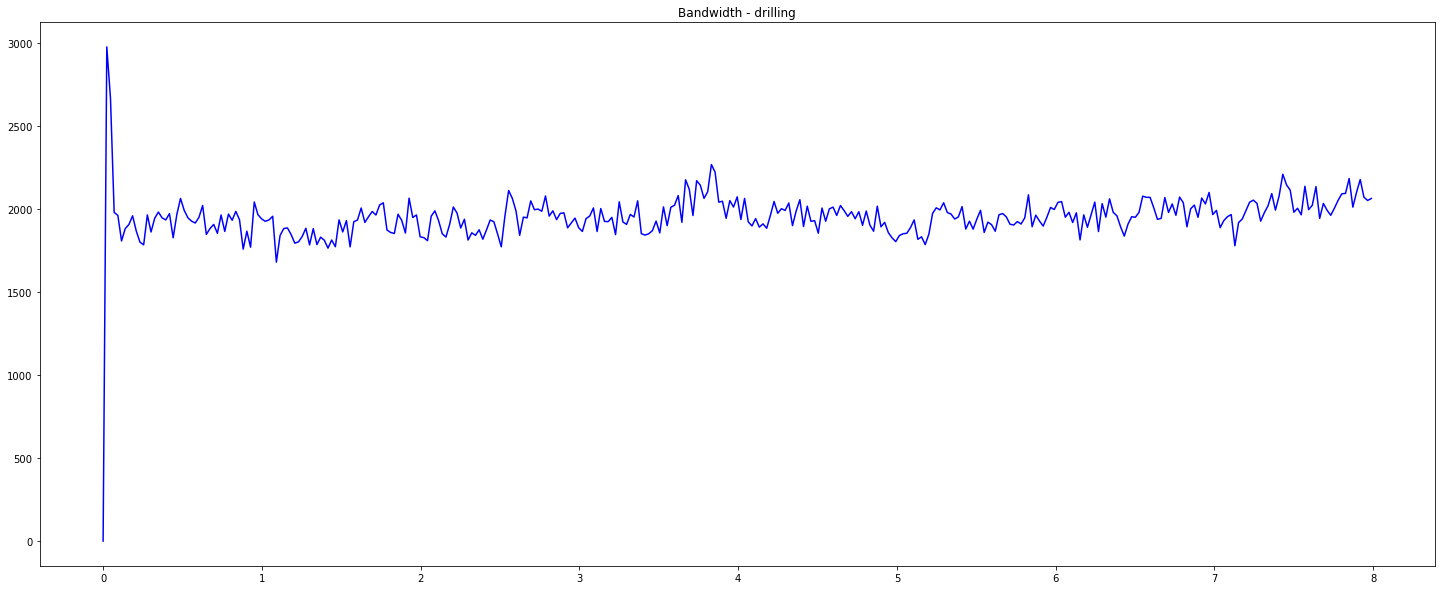

In [6]:
for _class in classes:
    sample = data.loc[data['class'] == _class].head(1)
    file = sample.iloc[0, 0]
    fold = sample.iloc[0, 5]
    sound, sr = librosa.load(f'./db/fold{fold}/{file}')

    ae = amplitude_envelope(sound, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH)
    rms = root_mean_square(sound, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH)
    zcr = zero_crossing_rate(sound, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH)

    ae_frames = range(0, ae.size)
    ae_t = librosa.frames_to_time(ae_frames, hop_length=HOP_LENGTH)

    rms_frames = range(0, rms.size)
    rms_t = librosa.frames_to_time(rms_frames, hop_length=HOP_LENGTH)

    zcr_frames = range(0, zcr.size)
    zcr_t = librosa.frames_to_time(zcr_frames, hop_length=HOP_LENGTH)

    plt.figure(figsize=(15, 10))
    plt.title(f'{_class}')
    librosa.display.waveshow(sound, alpha = 0.5)
    plt.show()

    plt.figure(figsize=(15, 10))
    librosa.display.waveshow(sound, alpha = 0.5)
    plt.title(f'Amplitude Envelope, Root Mean Square, Zero Crossing Rate - {_class}')
    plt.plot(ae_t, ae, color='r')
    plt.plot(rms_t, rms, color='y')
    plt.plot(zcr_t, zcr, color='g')
    plt.legend(['Sound', 'Amplitude Envelope', 'Root Mean Square', 'Zero Crossing Rate'])

    plt.ylim(-1, 1)
    plt.show()

    sound_ft = fast_fourier_transform(sound)
    mag_spectrum = magnitude_spectrum(sound_ft)
    plot_magnitude_spectrum(signal_ft=sound_ft, magnitude=mag_spectrum, title=f'Magnitude Spectrum - {_class}', sr=sr, f_ratio=1)

    stft_sound = short_time_fourier_transform(signal=sound, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)
    y = np.power(np.abs(stft_sound), 2)
    plot_spectogram(Y=y, sr=sr, hop_length=HOP_LENGTH, title=f'Spectrogram - {_class}', y_axis='log')

    mfcc = extract_mfcc(signal=sound, n_mfcc=13, sr=sr)
    delta = get_delta(data=mfcc)
    plot_mfcc(data=delta, x_axis='time', sr=sr, title=f'MFCC - {_class}')

    sc_sound = extract_spectral_centroids(signal=sound, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)
    plot_spectral_centroid(data=sc_sound, title=f'Spectral Centroid {_class}')

    band = extract_bandwidth(signal=sound, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)
    plot_bandwidth(data=band, title=f'Bandwidth - {_class}')